In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter
from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

from pathlib import Path

import pandas as pd
import numpy as np

# Import functions to create decision trees
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# Import functions to create tree ensembles
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from sklearn import tree
from dmba import plotDecisionTree, classificationSummary, regressionSummary
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 

import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary


In [115]:

%matplotlib inline
from pathlib import Path
#!pip install dmba
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary

#set up graphic style in this case I am using the color scheme from xkcd.com
rcParams['figure.figsize'] = 5, 7 # Golden Mean
LABELS = ["No","Yes"]
#col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
#sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#!conda install -c conda-forge mord
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score



In [116]:
#
#!pip install imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [4]:
# Read a CSV file and transform to dataframe
df_CD_original = pd.read_csv("cardiovascular_disease.csv", encoding='Windows-1252', low_memory=False)
# Create a copy of the original DataFrame to work with, keeping the original data intact.
df_CD = df_CD_original.copy()
# Display the first 5 rows of the DataFrame to inspect the loaded data.
df_CD.head(5)

,General_Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [5]:
# Replace spaces in column names with underscores
df_CD.columns = df_CD.columns.str.replace(' ', '_')
# Display the first 2 rows 
df_CD.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4


In [6]:
# Iterate over each column
for column in df_CD.columns:
    # Get the value counts for the current column
    value_counts = df_CD[column].value_counts().reset_index()
    value_counts.columns = [column, 'Count']

    # Print the result
    print(f"\nValue counts for column '{column}':\n{value_counts}")



Value counts for column 'General_Health':
  General_Health   Count
0      Very Good  110395
1           Good   95364
2      Excellent   55954
3           Fair   35810
4           Poor   11331

Value counts for column 'Checkup':
                   Checkup   Count
0     Within the past year  239371
1  Within the past 2 years   37213
2  Within the past 5 years   17442
3      5 or more years ago   13421
4                    Never    1407

Value counts for column 'Exercise':
  Exercise   Count
0      Yes  239304
1       No   69449

Value counts for column 'Heart_Disease':
  Heart_Disease   Count
0            No  283882
1           Yes   24971
2             e       1

Value counts for column 'Skin_Cancer':
  Skin_Cancer   Count
0          No  278853
1         Yes   29992
2         wet       2
3        dsfg       1
4  12*lkl–«fg       1
5     q345345       1
6   serter-89       1
7     dfg 025       1
8   dfgkl–fg-       1
9   sertret-8       1

Value counts for column 'Other_Cancer':
  Othe

# 1. Perform an Exploratory Data Analysis (EDA) in Python, you must include at least the following points: 

##  1.1 Give a general description of the database, including size, data types, null/blank values, outliers, atypical values

###### Description: 


In [7]:
# Generate descriptive statistics 
df_CD.describe(include="all")

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854,308854,308753,308854,308854,308854,305766,308854,308854,308854,308854,308854.000000,308854.000000,308854.000000,308854,308854.000000,308854,308854.000000,308854.000000
unique,5,5,2,3,10,3,2,4,2,3,13,NaN,NaN,NaN,2,NaN,79,NaN,NaN
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,NaN,NaN,NaN,No,NaN,30,NaN,NaN
freq,110395,239371,239304,283882,278853,278975,244491,259141,207783,160118,33434,NaN,NaN,NaN,183590,NaN,90273,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.653639,83.588655,28.676831,NaN,5.096366,NaN,15.110441,6.296616
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.001476,21.343210,13.136633,NaN,8.199763,NaN,14.926238,8.582954
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,24.950000,12.020000,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,68.040000,24.210000,NaN,0.000000,NaN,4.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.000000,81.650000,27.440000,NaN,1.000000,NaN,12.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.000000,95.250000,31.870000,NaN,6.000000,NaN,20.000000,8.000000


Con esto podemos ver al contar que hay valores nulos en excercise y depression, tambien que tenemos mas variables cualitativas que cuantitativas. so we must do preprocessing so that the model is not deficient

###### size, data types

In [8]:
# Print the total number of elements (size)
print(f"The size of the Dataframe is {df_CD.size}")
# Print the dimensions (shape) 
print(f"The shape of the Dataframe is {df_CD.shape}")
# Print the data types of each column
print(f"\n          The data types are \n {df_CD.dtypes}")


The size of the Dataframe is 5868226
The shape of the Dataframe is (308854, 19)

          The data types are 
 General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                       int64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption               int64
Fruit_Consumption                object
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object


###### null

In [9]:
#null values for columns
print("null values for columns:")
print(df_CD.isnull().sum())
#the total null values
print(f"\n The total null values is {df_CD.isnull().sum().sum()}")

null values for columns:
General_Health                     0
Checkup                            0
Exercise                         101
Heart_Disease                      0
Skin_Cancer                        0
Other_Cancer                       0
Depression                      3088
Diabetes                           0
Arthritis                          0
Sex                                0
Age_Category                       0
Height_(cm)                        0
Weight_(kg)                        0
BMI                                0
Smoking_History                    0
Alcohol_Consumption                0
Fruit_Consumption                  0
Green_Vegetables_Consumption       0
FriedPotato_Consumption            0
dtype: int64

 The total null values is 3189


###### blank values

In [10]:
#null values for columns
print("null values for columns:")
print(df_CD.isna().sum())
#the total null values
print(f"\n The total null values is {df_CD.isna().sum().sum()}")

null values for columns:
General_Health                     0
Checkup                            0
Exercise                         101
Heart_Disease                      0
Skin_Cancer                        0
Other_Cancer                       0
Depression                      3088
Diabetes                           0
Arthritis                          0
Sex                                0
Age_Category                       0
Height_(cm)                        0
Weight_(kg)                        0
BMI                                0
Smoking_History                    0
Alcohol_Consumption                0
Fruit_Consumption                  0
Green_Vegetables_Consumption       0
FriedPotato_Consumption            0
dtype: int64

 The total null values is 3189


This seems like NaN values and Null values are the same here

In [11]:
# Create a list 'columns_with_negatives' to store the names of columns with negative values.
columns_with_negatives = []

# Iterate through each column in the DataFrame.
for column in df_CD.columns:
    # Check if the data type of the column is numeric (int or float).
    if df_CD[column].dtype in [int, float]:
        # Check if there are any negative values in the column.
        if (df_CD[column] < 0).any():
            # If negative values are found, append the column name to the list.
            columns_with_negatives.append(column)

# Check if there are columns with negative values and print the result.
if not columns_with_negatives:
    print("No negative values in the DataFrame.")
else:
    print(f"Columns with negative values: {', '.join(columns_with_negatives)}")


No negative values in the DataFrame.


###### Outliers

In [12]:
# pd.to_numeric for transform in numeric type
df_CD['Fruit_Consumption']=pd.to_numeric(df_CD['Fruit_Consumption'],errors='coerce')
# eliminate the nan
df_CD=df_CD.dropna()
# transform un int64 type
df_CD['Fruit_Consumption']=df_CD['Fruit_Consumption'].astype('int64')

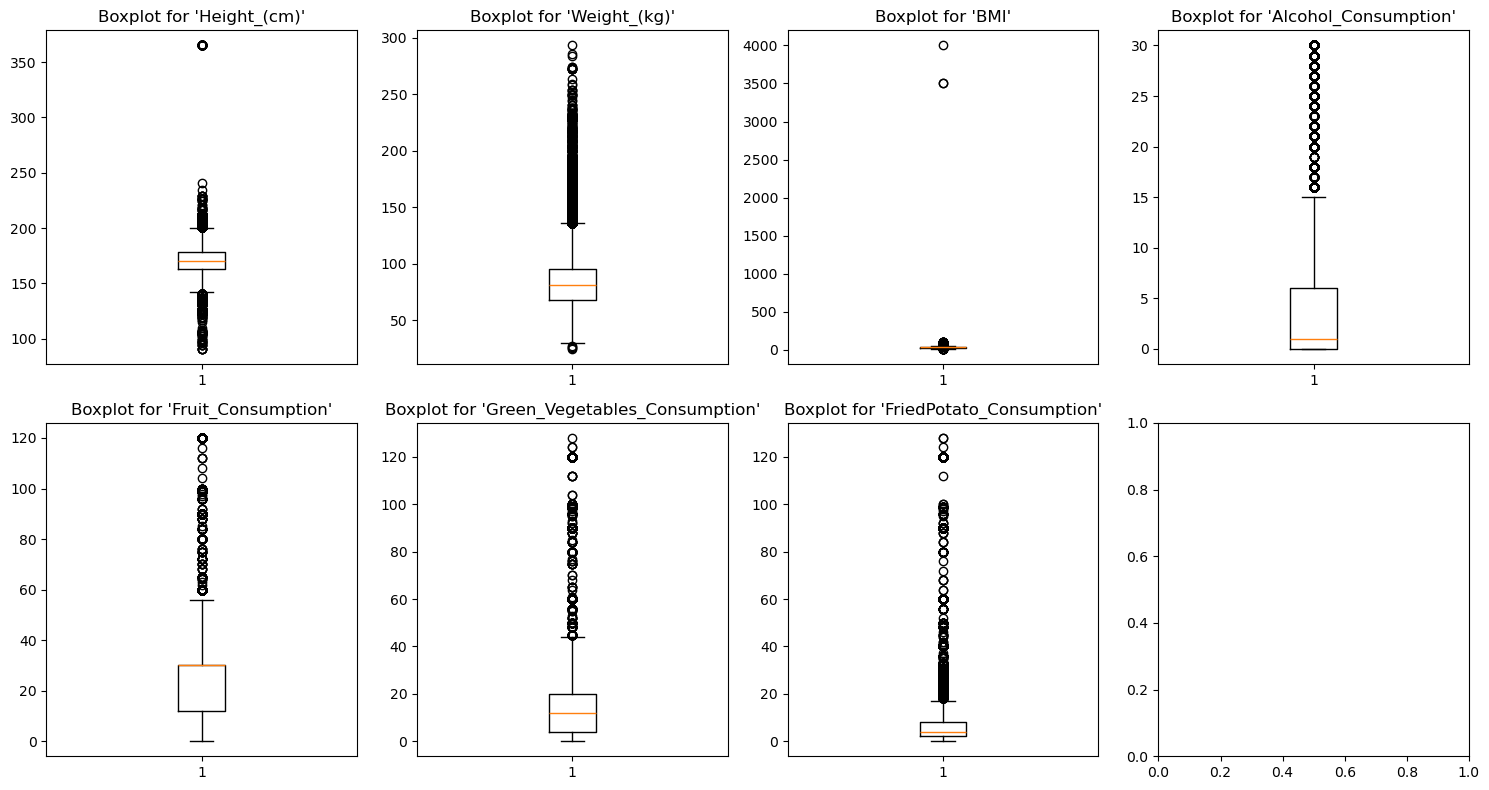

In [13]:

# Select only the numeric columns
Numeric_columns = df_CD.select_dtypes(include='number')

# Set the size of the plot based on the number of columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Flatten the subplots matrix for easier iteration
axes = axes.flatten()

# Create boxplots for each numeric column
for i, column in enumerate(Numeric_columns.columns):
    axes[i].boxplot(df_CD[column])
    axes[i].set_title(f"Boxplot for '{column}'")

# Adjust the layout to avoid overlaps
plt.tight_layout()
plt.show()


###### Atypical values

In [14]:
#  atypical values 
for column in df_CD.columns:
    U_values = df_CD[column].unique()
    print(f"Unique values for the column '{column}':")
    print(U_values)
    print("\n")
# Get the unique values for the current column.

Unique values for the column 'General_Health':
['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']


Unique values for the column 'Checkup':
['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']


Unique values for the column 'Exercise':
['No' 'Yes']


Unique values for the column 'Heart_Disease':
['No' 'Yes' 'e']


Unique values for the column 'Skin_Cancer':
['No' 'Yes' 'dsfg' 'wet' '12*lkl–«fg' 'q345345' 'serter-89' 'dfg 025'
 'dfgkl–fg-' 'sertret-8']


Unique values for the column 'Other_Cancer':
['No' 'Yes' 'dsgw45']


Unique values for the column 'Depression':
['No' 'Yes']


Unique values for the column 'Diabetes':
['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']


Unique values for the column 'Arthritis':
['Yes' 'No']


Unique values for the column 'Sex':
['Female' 'Male' 'Non-Binary']


Unique values for the column 'Age_Category':
['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '4

In [15]:
#eliminate atypical values
df_CD = df_CD[df_CD['Exercise'].isin(['Yes', 'No'])]
df_CD = df_CD[df_CD['Heart_Disease'].isin(['Yes', 'No'])]
df_CD = df_CD[df_CD['Skin_Cancer'].isin(['Yes', 'No'])]
df_CD = df_CD[df_CD['Depression'].isin(['Yes', 'No'])]
df_CD = df_CD[df_CD['Other_Cancer'].isin(['Yes', 'No'])]
print(f"The size of the Dataframe is {df_CD.size}")
print(f"The shape of the Dataframe is {df_CD.shape}")

The size of the Dataframe is 5807331
The shape of the Dataframe is (305649, 19)


In [16]:
# We have nominal and ordinal categorical variables, as well as quantitative variables.
# Fix the variable types.
# Transform to categorical type
df_CD['General_Health']=df_CD['General_Health'].astype('category')
df_CD['Exercise']=df_CD['Exercise'].astype('category')
df_CD['Heart_Disease']=df_CD['Heart_Disease'].astype('category')
df_CD['Skin_Cancer']=df_CD['Skin_Cancer'].astype('category')
df_CD['Other_Cancer']=df_CD['Other_Cancer'].astype('category')
df_CD['Depression']=df_CD['Depression'].astype('category')
df_CD['Arthritis']=df_CD['Arthritis'].astype('category')
df_CD['Smoking_History']=df_CD['Smoking_History'].astype('category')
df_CD['Diabetes']=df_CD['Diabetes'].astype('category')
df_CD['Sex']=df_CD['Sex'].astype('category')
df_CD['Diabetes']=df_CD['Diabetes'].astype('category')
df_CD['Age_Category']=df_CD['Age_Category'].astype('category')
df_CD['Checkup']=df_CD['Checkup'].astype('category')


## 1.2 Detail the criteria used to detect outliers, and how where the outliers and null values handled (if applicable): What was done with them? Why? etc

In [17]:
df_CD2 = df_CD.copy()

In [18]:
# Display the data types of each column
df_CD2.dtypes

General_Health                  category
Checkup                         category
Exercise                        category
Heart_Disease                   category
Skin_Cancer                     category
Other_Cancer                    category
Depression                      category
Diabetes                        category
Arthritis                       category
Sex                             category
Age_Category                    category
Height_(cm)                        int64
Weight_(kg)                      float64
BMI                              float64
Smoking_History                 category
Alcohol_Consumption                int64
Fruit_Consumption                  int64
Green_Vegetables_Consumption       int64
FriedPotato_Consumption            int64
dtype: object

In [19]:
df_visu = df_CD2.copy()

In [20]:
df_visu[["Height_(cm)", "Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]] = df_visu[["Height_(cm)", "Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]].astype(float)
df_visu.dtypes

General_Health                  category
Checkup                         category
Exercise                        category
Heart_Disease                   category
Skin_Cancer                     category
Other_Cancer                    category
Depression                      category
Diabetes                        category
Arthritis                       category
Sex                             category
Age_Category                    category
Height_(cm)                      float64
Weight_(kg)                      float64
BMI                              float64
Smoking_History                 category
Alcohol_Consumption              float64
Fruit_Consumption                float64
Green_Vegetables_Consumption     float64
FriedPotato_Consumption          float64
dtype: object

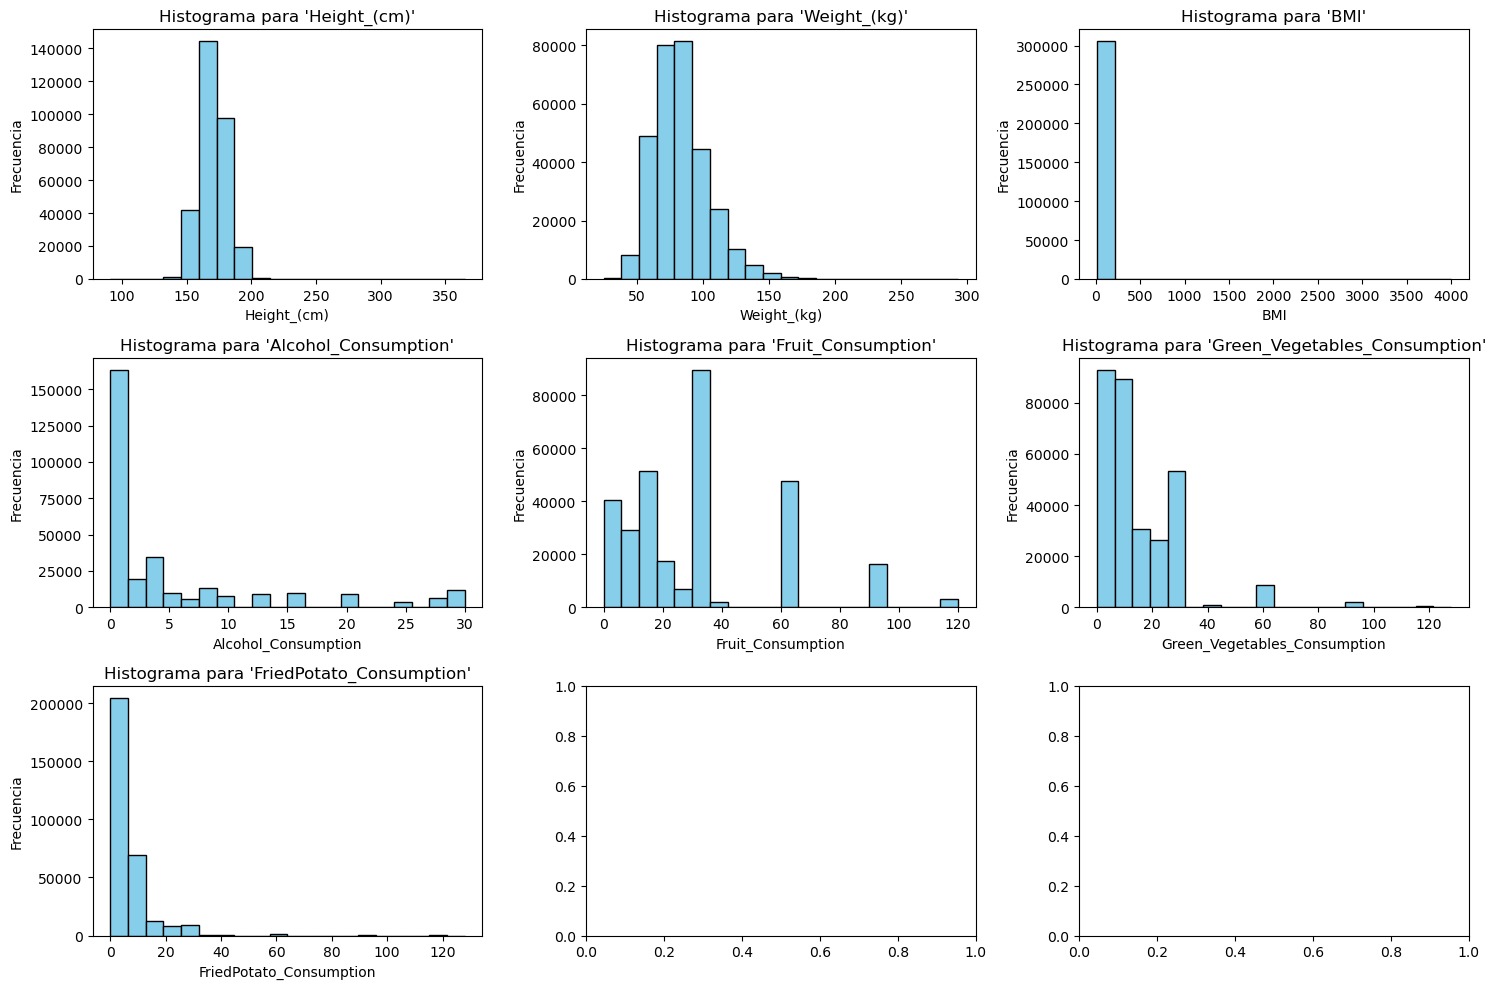

In [21]:
Numeric_columns = df_visu.select_dtypes(include=['float64'])

# Set the chart size based on the number of columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the subgraph array for easier iteration
axes = axes.flatten()

# We create histograms for each numeric column
for i, column in enumerate(Numeric_columns.columns):
    axes[i].hist(df_visu[column],bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Histograma para '{column}'")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

###### Outliers: 
Are those that are outside the 3 standard deviations and are values greater than 1.5 interquartile range.

- According to Panda and Dash (2015), outliers or outliers can be treated in several ways, depending on the objective of the data analysis. If the objective is to make predictions then the most necessary thing is to eliminate outliers, which can be a good way to reduce bias and improve the precision of data analysis. However, it is important to keep in mind that removing outliers can lead to the loss of important information.

In [22]:
# For the column "Height_(cm)"
# Calculate the interquartile range (IQR)
Q1 = df_CD2["Height_(cm)"].quantile(0.25)
Q3 = df_CD2["Height_(cm)"].quantile(0.75)
IQR = Q3 - Q1
# Identifies the upper and lower limits of outliers

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Filter the DataFrame to remove outliers
df_CD2 = df_CD2[(df_CD2["Height_(cm)"] >= limite_inferior) & (df_CD2["Height_(cm)"] <= limite_superior)]


# For the column "BMI"
# Calculate the interquartile range (IQR)
Q1 = df_CD2["BMI"].quantile(0.25)
Q3 = df_CD2["BMI"].quantile(0.75)
IQR = Q3 - Q1
# Identifies the upper and lower limits of outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Filter the DataFrame to remove outliers
df_CD2 = df_CD2[(df_CD2["BMI"] >= limite_inferior) & (df_CD2["BMI"] <= limite_superior)]


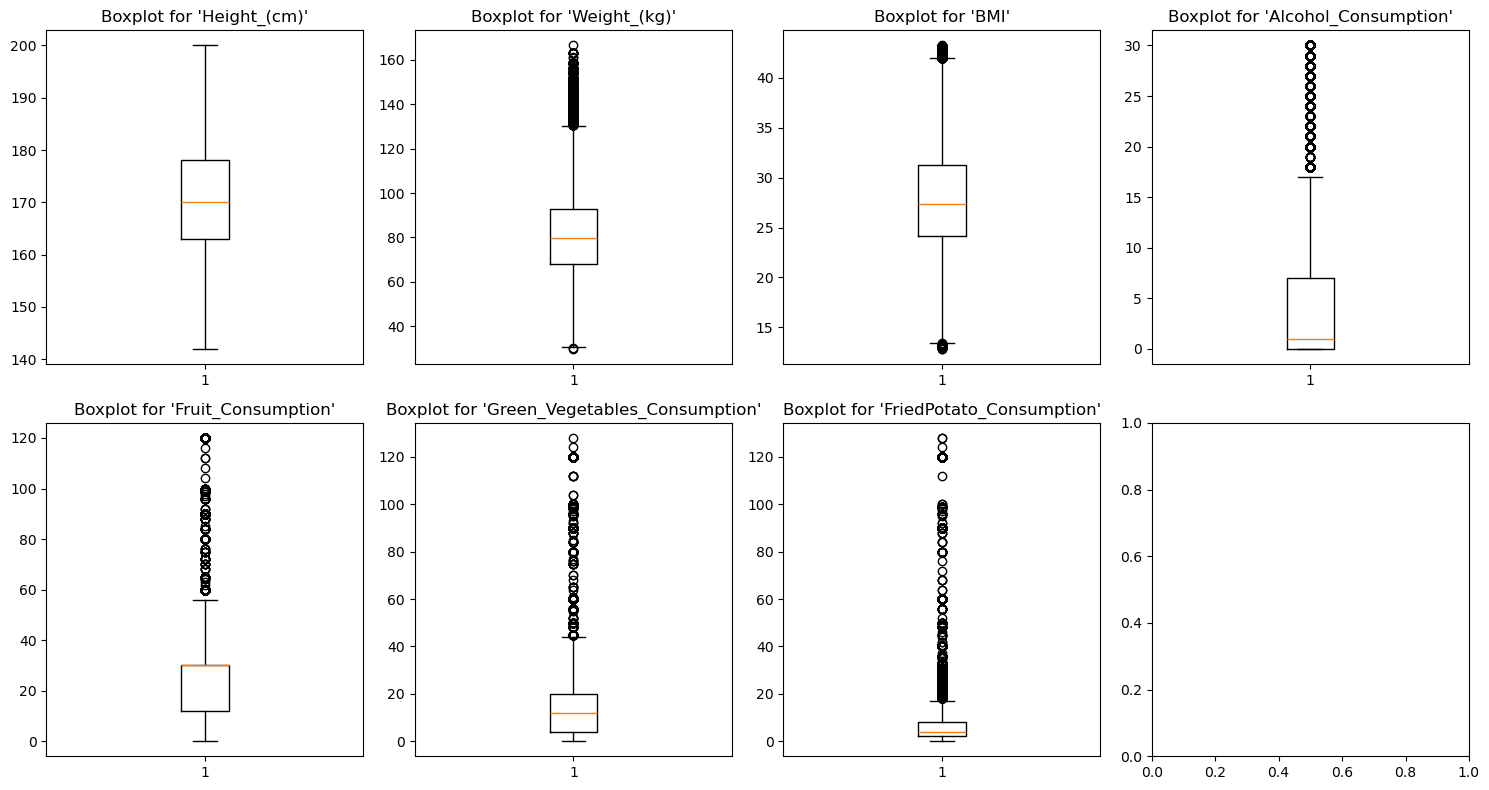

In [23]:
# Select only the numeric columns
Numeric_columns = df_CD2.select_dtypes(include='number')

# Set the size of the plot based on the number of columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Flatten the subplots matrix for easier iteration
axes = axes.flatten()

# Create boxplots for each numeric column
for i, column in enumerate(Numeric_columns.columns):
    axes[i].boxplot(df_CD2[column])
    axes[i].set_title(f"Boxplot for '{column}'")

# Adjust the layout to avoid overlaps
plt.tight_layout()
plt.show()


###### null values
"Null values or missing values" refer to missing data or information at a specific position in a data set.
Como tenemos una base de datos muy grande podemos eliminar los valores nulos

Whit this we can see that have some atypical values in the columns: Exercise, Heart_Disease, Skin_Cancer, Other_Cancer, Depression
- According to Zhang & Zhang (2021), Categorical data that carry null values or atypical values can affect the performance of the model, so the rows where the data are located must be eliminated. However, this leads to the loss of information, so it is recommended to have a large database.


###### null

In [24]:
#null values for columns
print("null values for columns:")
print(df_CD2.isnull().sum())
#the total null values
print(f"\n The total null values is {df_CD2.isnull().sum().sum()}")

null values for columns:
General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

 The total null values is 0


###### blank values

In [25]:
#null values for columns
print("null values for columns:")
print(df_CD2.isna().sum())
#the total null values
print(f"\n The total null values is {df_CD2.isna().sum().sum()}")

null values for columns:
General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

 The total null values is 0


In [26]:
df_CD2.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4


## 1.3 Explore the correlation between variables. Which variables seem to affect more the response variable and how?

In [27]:
#create a copy for the excercise 1.3
df_CD3 = df_CD2.copy()

In [28]:
# Replace categorical values with numerical values.

# Map the values ['Poor','Very Good','Good','Fair','Excellent'] to [1,2,3,4,5].
df_CD3['General_Health']=df_CD3['General_Health'].replace(to_replace=['Poor','Very Good','Good','Fair','Excellent'],value=[1,2,3,4,5])
# Map the values ['Within the past year', 'Within the past 2 years', 'Within the past 5 years', '5 or more years ago', 'Never'] to [1,2,3,4,5].
df_CD3['Checkup']=df_CD3['Checkup'].replace(to_replace=['Within the past year', 'Within the past 2 years', 'Within the past 5 years', '5 or more years ago', 'Never'],value=[1,2,3,4,5])

In [29]:
# get dummies
df_CD3 = pd.get_dummies(df_CD3,columns=['Heart_Disease','Exercise',"Diabetes",'Skin_Cancer','Other_Cancer','Depression','Arthritis','Sex','Smoking_History', "Age_Category"])

In [30]:
df_CD3 = df_CD3.astype(float)
df_CD3.dtypes

General_Health                                         float64
Checkup                                                float64
Height_(cm)                                            float64
Weight_(kg)                                            float64
BMI                                                    float64
Alcohol_Consumption                                    float64
Fruit_Consumption                                      float64
Green_Vegetables_Consumption                           float64
FriedPotato_Consumption                                float64
Heart_Disease_No                                       float64
Heart_Disease_Yes                                      float64
Exercise_No                                            float64
Exercise_Yes                                           float64
Diabetes_No                                            float64
Diabetes_No, pre-diabetes or borderline diabetes       float64
Diabetes_Yes                                           

In [31]:
#size and shape
print(f"The size of the Dataframe is {df_CD3.size}")
print(f"The shape of the Dataframe is {df_CD3.shape}")

The size of the Dataframe is 12686032
The shape of the Dataframe is (295024, 43)


In [32]:
# correlation
df_CD3.corr()

,General_Health,Checkup,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease_No,...,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+
General_Health,1.000000,0.049103,0.014633,-0.057811,-0.077642,0.007016,0.033803,0.047998,-0.007100,0.041335,...,0.023215,0.015339,0.009234,0.002460,-0.000466,-0.008801,-0.022622,-0.024139,-0.024036,-0.028560
Checkup,0.049103,1.000000,0.098472,-0.003240,-0.064780,0.045796,-0.045841,-0.041239,0.060143,0.086849,...,0.082353,0.053634,0.030465,0.002791,-0.008871,-0.028896,-0.072126,-0.092132,-0.083271,-0.091780
Height_(cm),0.014633,0.098472,1.000000,0.551155,0.019913,0.127027,-0.048261,-0.032567,0.109885,-0.018193,...,0.027454,0.026845,0.021254,0.020356,0.012075,0.004097,-0.009259,-0.038258,-0.052513,-0.098053
Weight_(kg),-0.057811,-0.003240,0.551155,1.000000,0.838557,-0.008685,-0.089391,-0.069119,0.097650,-0.049296,...,0.025421,0.039024,0.047944,0.053197,0.041590,0.031023,0.011198,-0.016776,-0.042190,-0.123862
BMI,-0.077642,-0.064780,0.019913,0.838557,1.000000,-0.092732,-0.076198,-0.064053,0.046763,-0.046850,...,0.013314,0.029222,0.043465,0.050844,0.041398,0.034916,0.019561,0.004713,-0.017761,-0.090195
Alcohol_Consumption,0.007016,0.045796,0.127027,-0.008685,-0.092732,1.000000,-0.013533,0.059620,0.020337,0.036645,...,0.008372,0.007672,-0.002631,0.001518,0.003171,0.006400,0.013074,0.008395,0.000935,-0.019347
Fruit_Consumption,0.033803,-0.045841,-0.048261,-0.089391,-0.076198,-0.013533,1.000000,0.271051,-0.061172,0.021831,...,0.007445,0.008081,-0.002756,-0.006054,-0.005062,0.001783,0.011621,0.005072,0.014494,0.023847
Green_Vegetables_Consumption,0.047998,-0.041239,-0.032567,-0.069119,-0.064053,0.059620,0.271051,1.000000,0.003071,0.024748,...,0.005135,0.012653,0.015395,0.017177,0.008571,0.004374,0.011622,0.000887,0.000640,0.001246
FriedPotato_Consumption,-0.007100,0.060143,0.109885,0.097650,0.046763,0.020337,-0.061172,0.003071,1.000000,0.009377,...,0.035489,0.017543,0.009406,-0.000179,-0.013831,-0.028618,-0.043655,-0.043521,-0.036964,-0.044134
Heart_Disease_No,0.041335,0.086849,-0.018193,-0.049296,-0.046850,0.036645,0.021831,0.024748,0.009377,1.000000,...,0.065851,0.061551,0.048612,0.038565,0.013319,-0.013502,-0.041195,-0.080374,-0.100170,-0.143042


In [33]:
# Calculate the correlation matrix for Heart_Disease_Yes
correlation_matrix = df_CD3.corr()
correlation_matrix['Heart_Disease_Yes']

General_Health                                        -0.041335
Checkup                                               -0.086849
Height_(cm)                                            0.018193
Weight_(kg)                                            0.049296
BMI                                                    0.046850
Alcohol_Consumption                                   -0.036645
Fruit_Consumption                                     -0.021831
Green_Vegetables_Consumption                          -0.024748
FriedPotato_Consumption                               -0.009377
Heart_Disease_No                                      -1.000000
Heart_Disease_Yes                                      1.000000
Exercise_No                                            0.096352
Exercise_Yes                                          -0.096352
Diabetes_No                                           -0.169806
Diabetes_No, pre-diabetes or borderline diabetes       0.020250
Diabetes_Yes                            

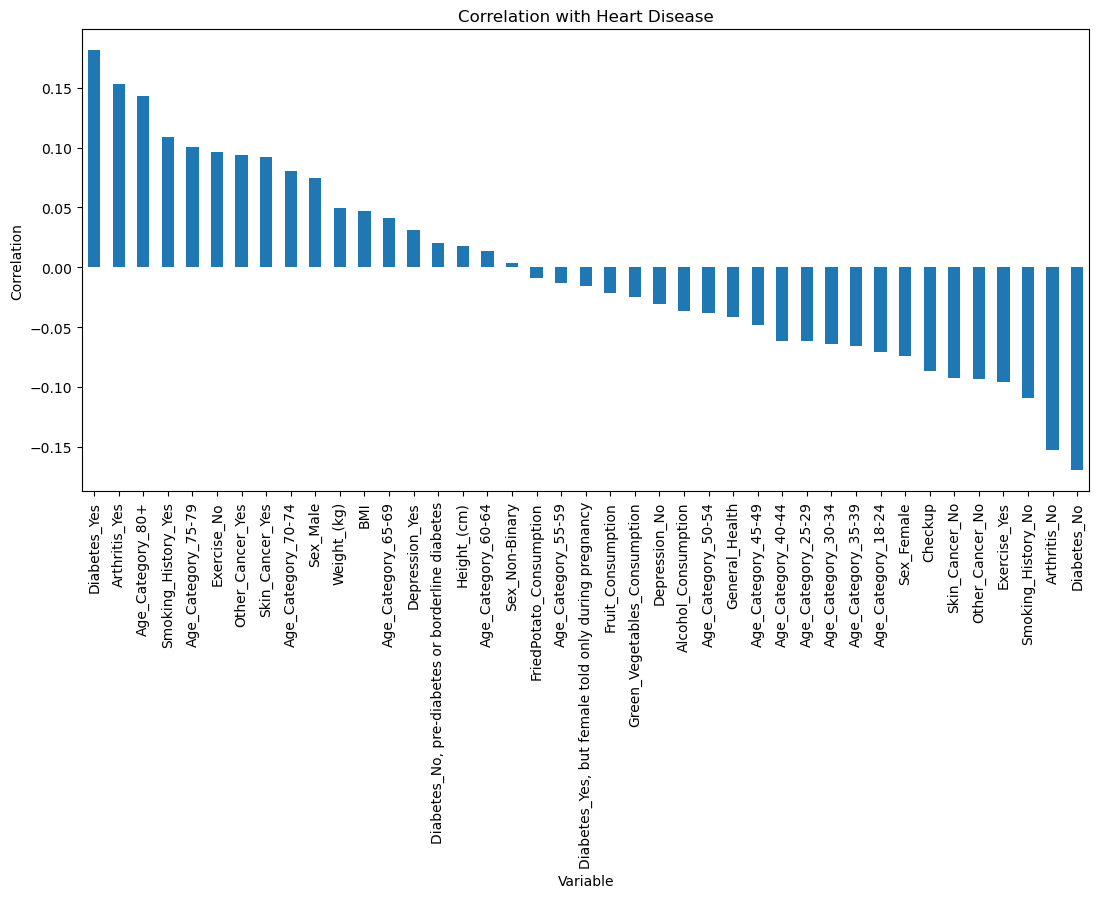

In [34]:
# we sort the correlation matrix by the values of the 'Heart_Disease_Yes' column in descending order
correlation_matrix_filtered = correlation_matrix.drop(['Heart_Disease_Yes', 'Heart_Disease_No'], axis=0)

sorted_correlation = correlation_matrix_filtered["Heart_Disease_Yes"].sort_values(ascending=False)

# We plot the ordered correlation matrix
plt.figure(figsize=(13, 6))
sorted_correlation.plot(kind='bar')
plt.title('Correlation with Heart Disease')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.show()


In [35]:
#we use the copy of df_CD2 and 
df_CD3 = df_CD2.copy()

df_CD3['General_Health']=df_CD3['General_Health'].replace(to_replace=['Poor','Very Good','Good','Fair','Excellent'],value=[1,2,3,4,5])
df_CD3['Checkup']=df_CD3['Checkup'].replace(to_replace=['Within the past year', 'Within the past 2 years', 'Within the past 5 years', '5 or more years ago', 'Never'],value=[1,2,3,4,5])
#

In [36]:
# get dummies
df_CD3 = pd.get_dummies(df_CD3,columns=['Heart_Disease','Exercise',"Diabetes",'Skin_Cancer','Other_Cancer','Depression','Arthritis','Sex','Smoking_History', "Age_Category"], drop_first=True)

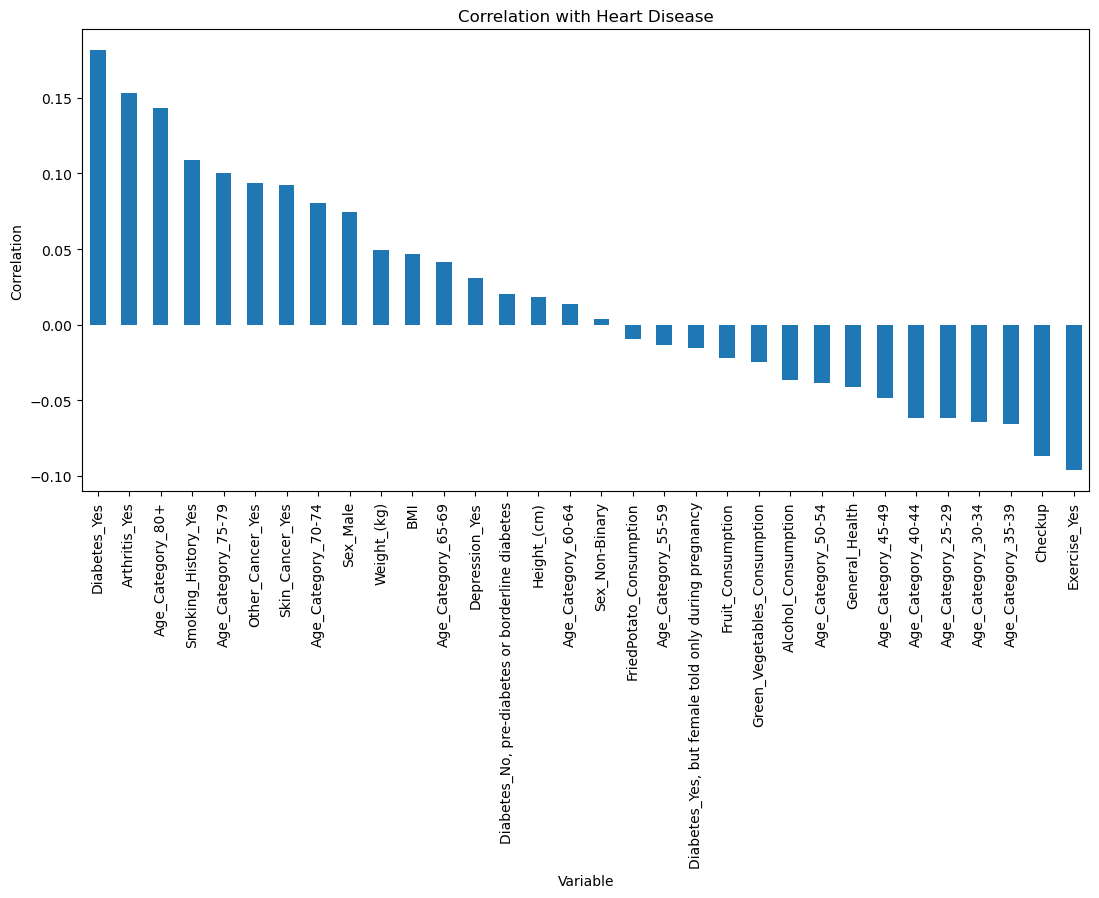

In [37]:
# we sort the correlation matrix by the values of the 'Heart_Disease_Yes' column in descending order
correlation_matrix = df_CD3.corr()

correlation_matrix_filtered = correlation_matrix.drop(['Heart_Disease_Yes'], axis=0)

sorted_correlation = correlation_matrix_filtered["Heart_Disease_Yes"].sort_values(ascending=False)

# We plot the ordered correlation matrix
plt.figure(figsize=(13, 6))
sorted_correlation.plot(kind='bar')
plt.title('Correlation with Heart Disease')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.show()



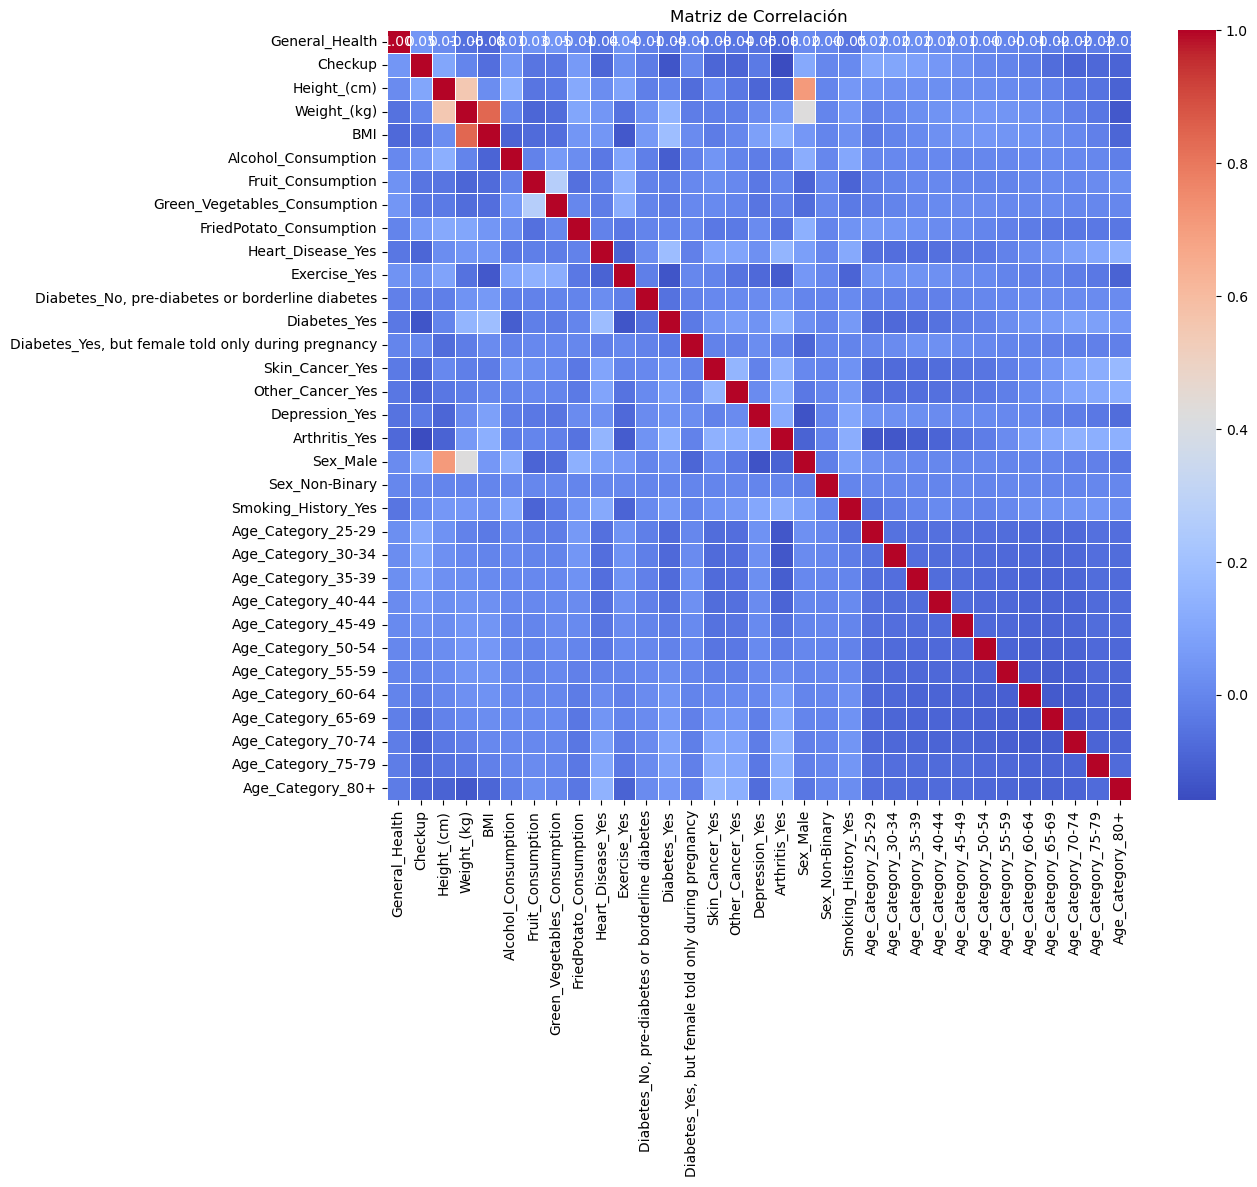

In [38]:
correlation_matrix = df_CD3.corr()


# Set the size of the figure
plt.figure(figsize=(12, 10))

# We create a heat map with the correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Matriz de Correlación')
plt.show()

In [39]:
df_CD3 = df_CD3.astype(float)

## 1.4 Data visualization: Visualize all predictor variables and analyze its distributions using appropriate visualization methods. Analyze the distribution of the response variable.

In [40]:
df_visu = df_CD2.copy()
# Defining the values
general_health_types = [
    "Poor",
    "Fair",
    "Good",
    "Very Good",
    "Excellent"]
checkup_types  = [
    "Within the past year",
    "Within the past 2 years",
    "Within the past 5 years",
    "5 or more years ago",
    "Never"]
age_category_types = [
    "18-24",
    "25-29",
    "30-34",
    "35-39",
    "40-44",
    "45-49",
    "50-54",
    "55-59",
    "60-64",
    "65-69",
    "70-74",
    "75-79",
    "80+"]

# Defining income values as an ordinal categorical variable type object
general_health_dtype = pd.api.types.CategoricalDtype(categories=general_health_types, ordered=True)
df_visu["General_Health"] = df_visu["General_Health"].astype(general_health_dtype)

checkup_dtype = pd.api.types.CategoricalDtype(categories=checkup_types, ordered=True)
df_visu["Checkup"] = df_visu["Checkup"].astype(checkup_dtype)

age_category_dtype = pd.api.types.CategoricalDtype(categories=age_category_types, ordered=True)
df_visu["Age_Category"] = df_visu["Age_Category"].astype(age_category_dtype)

df_visu.sort_values(by=["General_Health","Checkup","Age_Category"], inplace=True)

In [41]:
df_visu.dtypes

General_Health                  category
Checkup                         category
Exercise                        category
Heart_Disease                   category
Skin_Cancer                     category
Other_Cancer                    category
Depression                      category
Diabetes                        category
Arthritis                       category
Sex                             category
Age_Category                    category
Height_(cm)                        int64
Weight_(kg)                      float64
BMI                              float64
Smoking_History                 category
Alcohol_Consumption                int64
Fruit_Consumption                  int64
Green_Vegetables_Consumption       int64
FriedPotato_Consumption            int64
dtype: object

In [42]:
df_visu[["Height_(cm)", "Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]] = df_visu[["Height_(cm)", "Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]].astype(float)
df_visu.dtypes

General_Health                  category
Checkup                         category
Exercise                        category
Heart_Disease                   category
Skin_Cancer                     category
Other_Cancer                    category
Depression                      category
Diabetes                        category
Arthritis                       category
Sex                             category
Age_Category                    category
Height_(cm)                      float64
Weight_(kg)                      float64
BMI                              float64
Smoking_History                 category
Alcohol_Consumption              float64
Fruit_Consumption                float64
Green_Vegetables_Consumption     float64
FriedPotato_Consumption          float64
dtype: object

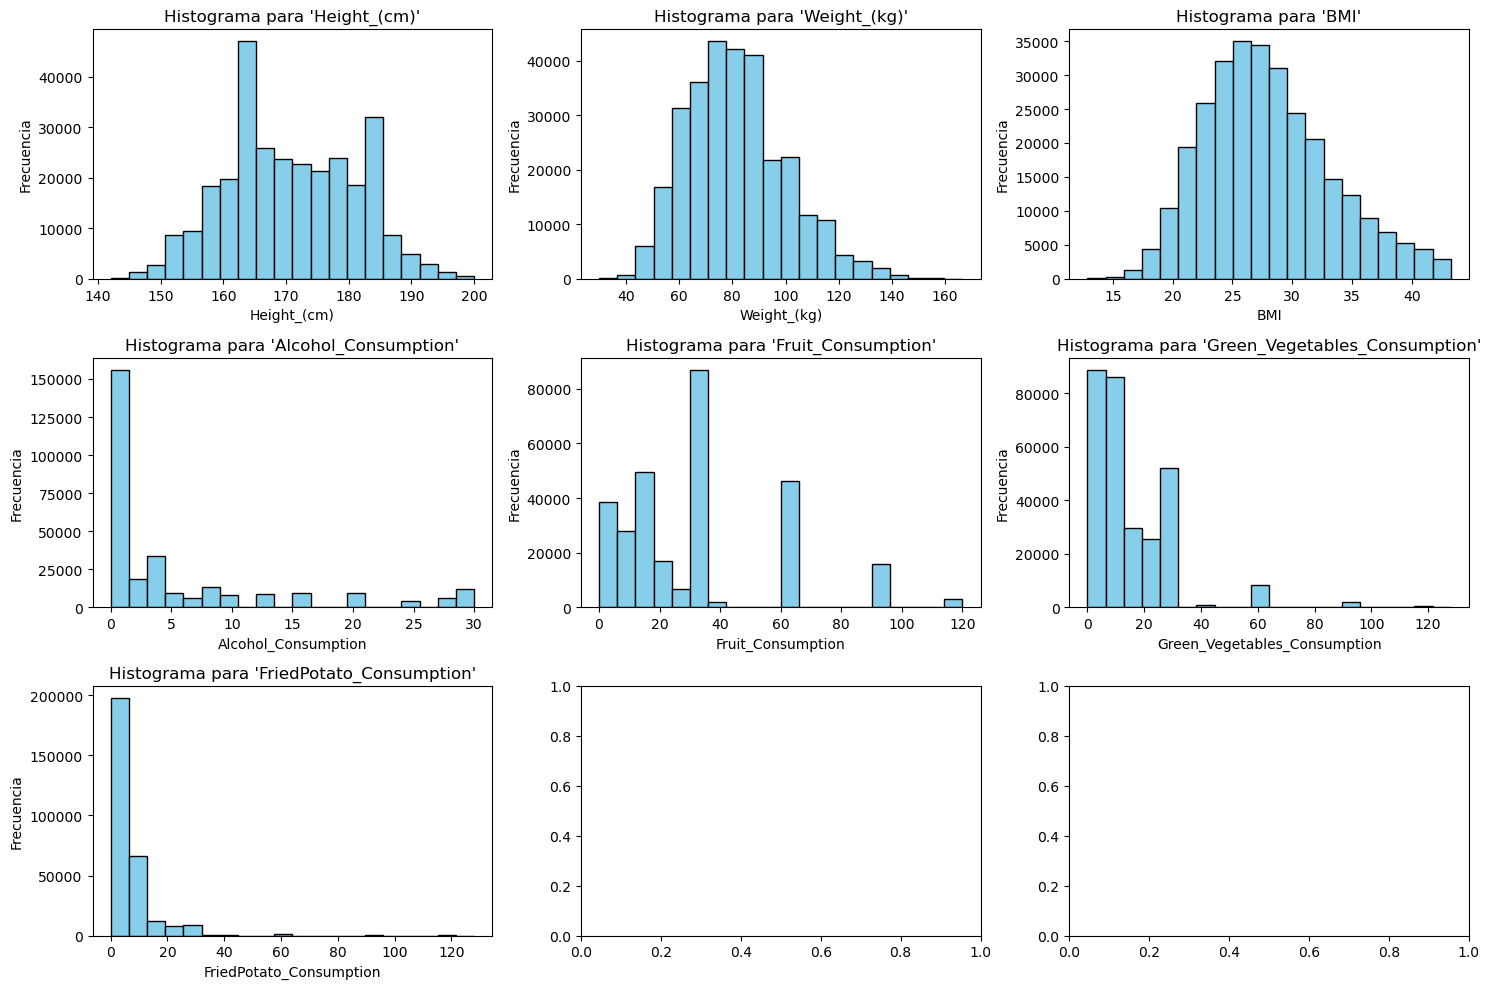

In [43]:
Numeric_columns = df_visu.select_dtypes(include=['float64'])

# Set the chart size based on the number of columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the subgraph array for easier iteration
axes = axes.flatten()

# We create histograms for each numeric column
for i, column in enumerate(Numeric_columns.columns):
    axes[i].hist(df_visu[column],bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Histograma para '{column}'")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

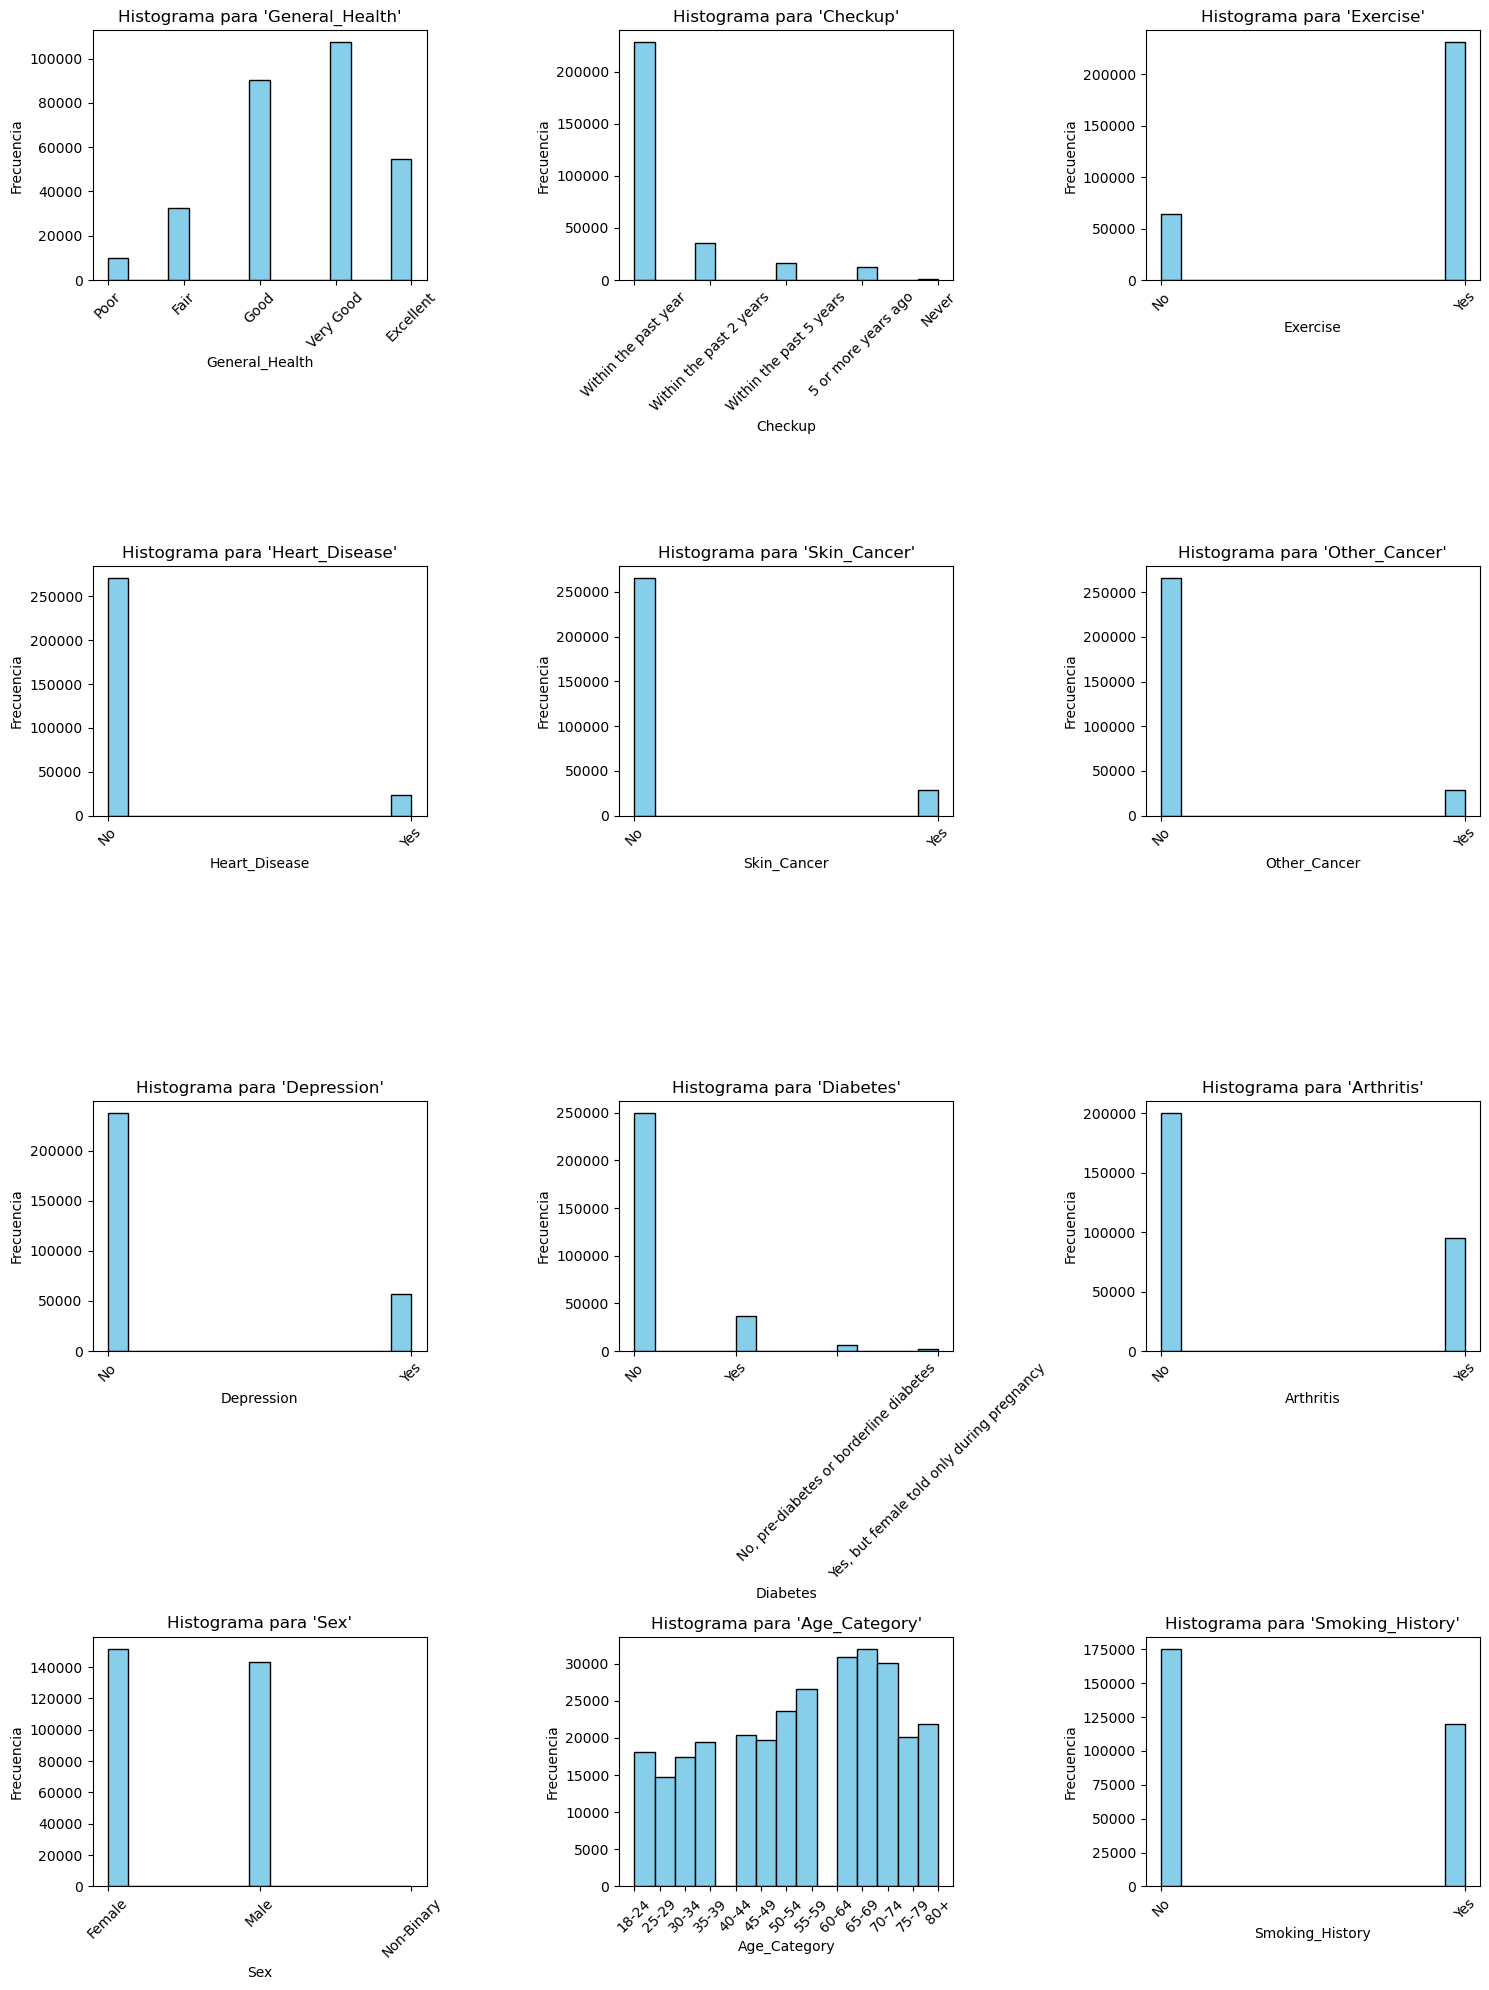

In [44]:
Category_columns = df_visu.select_dtypes(include=['category'])

# Set the chart size based on the number of columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

# Flatten the subgraph array for easier iteration
axes = axes.flatten()

# We create histograms for each numeric column
for i, column in enumerate(Category_columns.columns):
    axes[i].hist(df_visu[column],bins=15, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Histograma para '{column}'")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)
   

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

# 2. The dataset is unbalanced. Investigate what is an unbalanced dataset, the problems caused by this type of dataset, and at least 2 techniques that can be applied during training to reduce its effect. Use academic references for this investigation and cite them (papers or books, internet blogs are not acceptable) 

An unbalanced dataset is one in which the distribution of the target variable is not uniform. In other words, there is a significant difference in the number of examples for each class of the target variable. This can cause problems for machine learning algorithms, as they may be biased towards the majority class. Unbalanced datasets can cause a number of problems for machine learning algorithms, including:

- Reduced accuracy
- Increased false negatives
- Increased overfitting

There are a number of techniques that can be applied during training to reduce the effect of unbalanced datasets, including:
###### Undersampling
Undersampling involves removing examples of the majority class from the training set. This can help to reduce the bias of the machine learning algorithm towards the majority class.
###### Oversampling 
Oversampling involves creating new examples of the minority class. This can help to increase the exposure of the machine learning algorithm to the minority class.

In [45]:
df_2CD = df_CD3.copy()

In [46]:
#Count the frequency of the variable Heart_Disease_Yes
df_2CD['Heart_Disease_Yes'].value_counts()

Heart_Disease_Yes
0.0    271307
1.0     23717
Name: count, dtype: int64

#####  academic references
- Chawla, N. V., Japkowicz, N., & Kotz, S. (2004). Editorial: Special issue on learning from imbalanced data sets. ACM SIGKDD Explorations Newsletter, 6(1), 1-6.
* He, H., & Bai, Y. (2009). SMOTE: Synthetic minority over-sampling technique. Advances in artificial intelligence, 163-172.
* López, V., Fernández, A., García, S., Pazzani, M., & Herrera, F. (2013). An overview of classification techniques for imbalanced data: State-of-the-art and open challenges. Knowledge and information systems, 33(1), 1-40.

# 3. Divide the dataset in a training, validation, and test set. Make sure that the distributions in the training, validation, and test set are similar (provide a graph with the number of observations on each class for the three sets). Justify the percentage of observations assigned to each dataset using literature (include references to a paper or books to justify the percentage selected, class slides or internet blogs are not a valid reference).

In [47]:
df_3CD = df_2CD.copy()

In [48]:
# Define the list predictor variables for the model.

var_pre = ['General_Health', 'Checkup', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
                          'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
                         'Exercise_Yes', 'Diabetes_No, pre-diabetes or borderline diabetes',
                          'Diabetes_Yes', 'Diabetes_Yes, but female told only during pregnancy', 'Skin_Cancer_Yes',
                          'Other_Cancer_Yes', 'Depression_Yes', 'Arthritis_Yes', 'Sex_Male', 'Sex_Non-Binary',
                          'Smoking_History_Yes', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39',
                          'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_50-54', 'Age_Category_55-59',
                          'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79',
                          'Age_Category_80+']
# Create the feature matrix 'X' and target variable 'y' 
X = df_3CD[var_pre]
y = df_3CD["Heart_Disease_Yes"] 

# Split the data into training, validation, and test sets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes for each split.
print('Training   - X: ', X_train.shape)
print('Validation - X: ', X_val.shape)
print('Test       - X: ', X_test.shape)

print('Training   - y: ', y_train.shape)
print('Validation - y: ', y_val.shape)
print('Test       - y: ', y_test.shape)

Training   - X:  (206516, 32)
Validation - X:  (44254, 32)
Test       - X:  (44254, 32)
Training   - y:  (206516,)
Validation - y:  (44254,)
Test       - y:  (44254,)


## y - sets

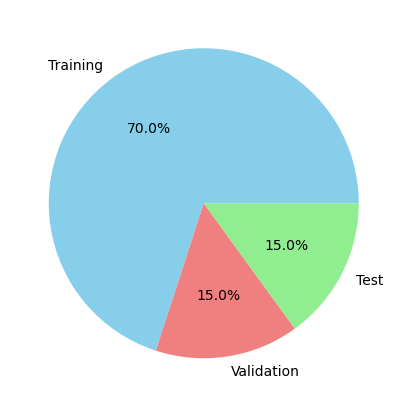

In [49]:
# Create a pie chart to visualize the distribution of data across training, validation, and test sets.
# 'a' contains the lengths of the target variables 
a = [len(y_train), len(y_val), len(y_test)]
# 'b' contains labels for the sets
b = ["Training", "Validation", "Test"]
#colors
colors = ['skyblue', 'lightcoral', 'lightgreen']
# create a pie chart
fig, ax = plt.subplots()
ax.pie(a, labels=b, autopct='%1.1f%%', colors=colors)
#display the pie chart
plt.show()

## Training set - y

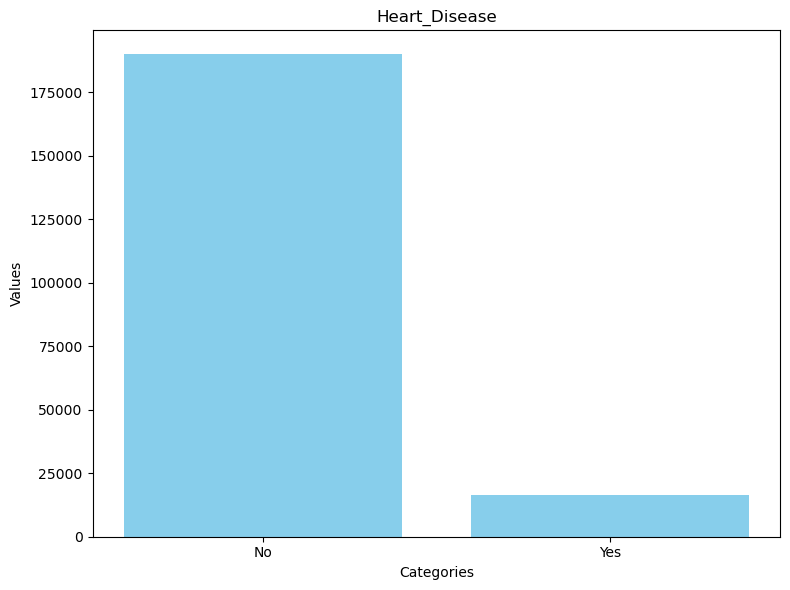

In [50]:
# Data for the bar chart
categories = ['No','Yes'] 
values = [y_train[y_train==0].count(),y_train[y_train==1].count()] 

# Create the bar chart
plt.figure(figsize=(8, 6)) 
plt.bar(categories, values, color='skyblue')

# Add title and labels
plt.title('Heart_Disease')
plt.xlabel('Categories')
plt.ylabel('Values')

# Display the chart
plt.tight_layout()
plt.show()

## Validation set - y

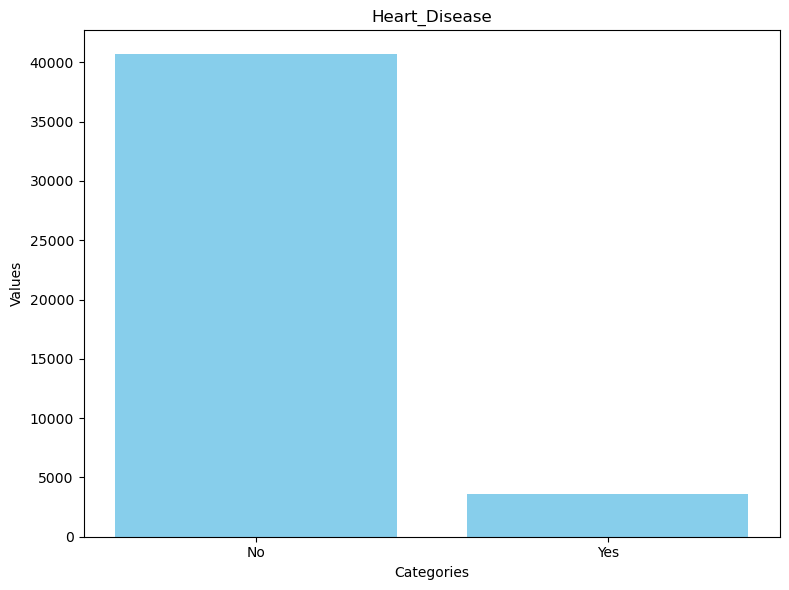

In [51]:
# Data for the bar chart
categories = ['No','Yes'] 
values = [y_val[y_val==0].count(),y_val[y_val==1].count()] 

# Create the bar chart
plt.figure(figsize=(8, 6)) 
plt.bar(categories, values, color='skyblue')

# Add title and labels
plt.title('Heart_Disease')
plt.xlabel('Categories')
plt.ylabel('Values')

# Display the chart
plt.tight_layout()
plt.show()


## Test set - y

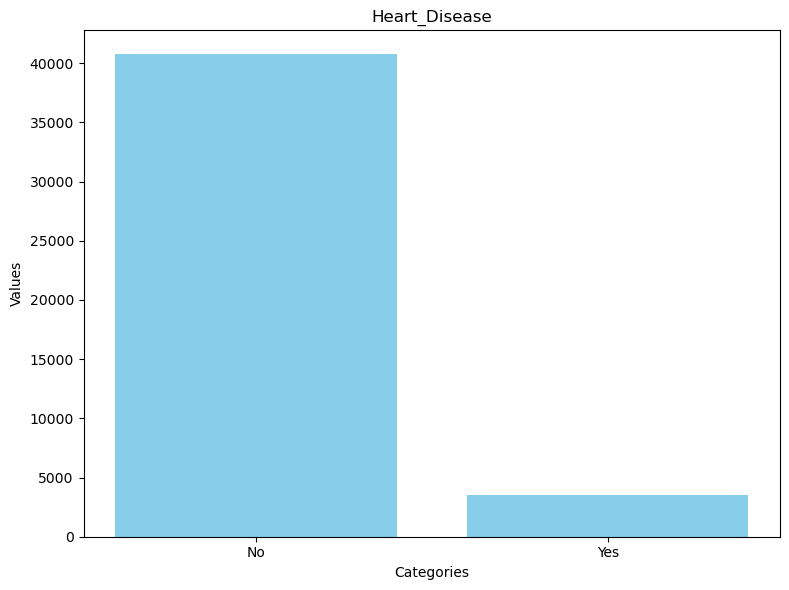

In [52]:
# Data for the bar chart
categories = ['No','Yes'] 
values = [y_test[y_test==0].count(),y_test[y_test==1].count()]  

# Create the bar chart
plt.figure(figsize=(8, 6))  
plt.bar(categories, values, color='skyblue')

# Add title and labels
plt.title('Heart_Disease')
plt.xlabel('Categories')
plt.ylabel('Values')

# Display the chart
plt.tight_layout()
plt.show()

## unbalanced model

In [53]:
#we create a function that creates the model that we will use each time
#Function for unbalanced model
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
# for create a confusion matrix
def mostrar_resultados(
    y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

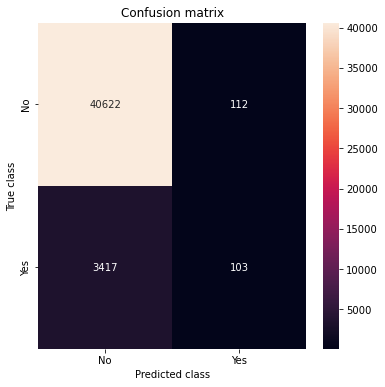

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     40734
         1.0       0.48      0.03      0.06      3520

    accuracy                           0.92     44254
   macro avg       0.70      0.51      0.51     44254
weighted avg       0.89      0.92      0.89     44254



In [55]:
model = run_model(X_train, X_test, y_train, y_test)
# Make predictions on the test set using the trained model.
pred_y = model.predict(X_test)
# Display the results of the model evaluation.
mostrar_resultados(y_test, pred_y)

# Method 1

### Oversampling

In [56]:
# Create RandomOverSampler object with sampling_strategy
os = RandomOverSampler(sampling_strategy=1)

# Apply sampling on training data
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

# Print the distribution of class labels before and after resampling
print("Distribution of class labels before resampling: {}".format(Counter(y_train)))
print("Distribution of class labels after resampling: {}".format(Counter(y_train_res)))


Distribution of class labels before resampling: Counter({0.0: 189904, 1.0: 16612})
Distribution of class labels after resampling: Counter({0.0: 189904, 1.0: 189904})


In [57]:
model = run_model(X_train_res, X_val, y_train_res, y_val)

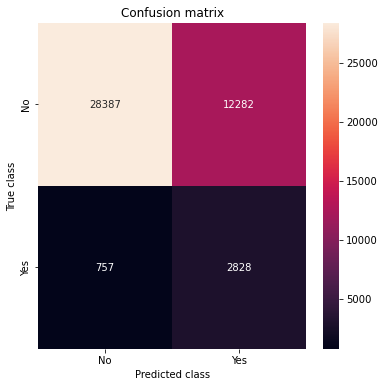

              precision    recall  f1-score   support

         0.0       0.97      0.70      0.81     40669
         1.0       0.19      0.79      0.30      3585

    accuracy                           0.71     44254
   macro avg       0.58      0.74      0.56     44254
weighted avg       0.91      0.71      0.77     44254



In [58]:
pred_y = model.predict(X_val)
mostrar_resultados(y_val, pred_y)

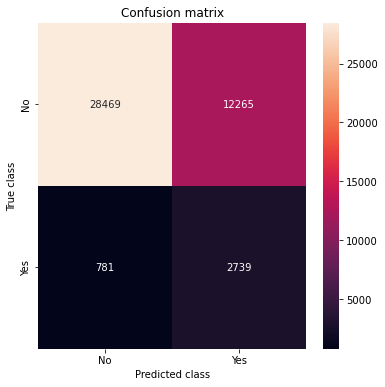

              precision    recall  f1-score   support

         0.0       0.97      0.70      0.81     40734
         1.0       0.18      0.78      0.30      3520

    accuracy                           0.71     44254
   macro avg       0.58      0.74      0.55     44254
weighted avg       0.91      0.71      0.77     44254



In [59]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

# Method 2 

### Undersampling

In [60]:
# Show the class distribution before undersampling
print("Class distribution before undersampling:", Counter(y_train))

# Apply RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=8)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Show the class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled))

# Train a model (you can use Logistic Regression as an example)
model = LogisticRegression()
model.fit(X_resampled, y_resampled)


Class distribution before undersampling: Counter({0.0: 189904, 1.0: 16612})
Class distribution after undersampling: Counter({0.0: 16612, 1.0: 16612})


C:\Users\saida\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

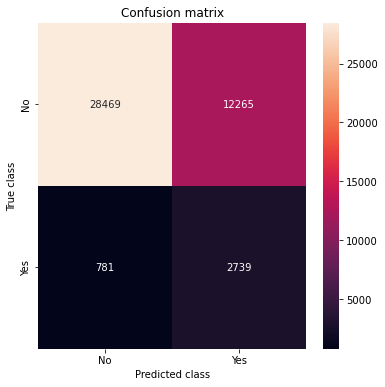

              precision    recall  f1-score   support

         0.0       0.97      0.70      0.81     40734
         1.0       0.18      0.78      0.30      3520

    accuracy                           0.71     44254
   macro avg       0.58      0.74      0.55     44254
weighted avg       0.91      0.71      0.77     44254



In [61]:
y_pred = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

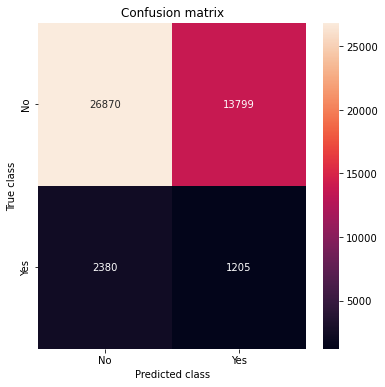

              precision    recall  f1-score   support

         0.0       0.92      0.66      0.77     40669
         1.0       0.08      0.34      0.13      3585

    accuracy                           0.63     44254
   macro avg       0.50      0.50      0.45     44254
weighted avg       0.85      0.63      0.72     44254



In [62]:
y_pred = model.predict(X_val)
mostrar_resultados(y_val, pred_y)

# 4 Implement a machine learning algorithm and statistically prove which of the  two techniques researched in point 2 improves the prediction. To statistically prove this point, you must define the null and alternative hypothesis (𝐻!,𝐻") , test statistic, calculate Pvalue, and draw a conclusion (revise your notes/lectures from Statics class, and select an appropriate test). In the presentation and report the statistical method applied needs to be clearly explained.

In [63]:
# counts value for each class 
y_val.value_counts()

Heart_Disease_Yes
0.0    40669
1.0     3585
Name: count, dtype: int64

## Test logistic regression method 1

In [64]:

import statsmodels.api as sm

# Ensure both DataFrames have the same indices
X = X_train_res.reset_index(drop=True)
y_train_res = y_train_res.reset_index(drop=True)

# Add a constant to the independent variables
X1 = sm.add_constant(X, prepend=True)

# Fit the logistic regression model
modelo = sm.Logit(endog=y_train_res, exog=X1)
modelo_A = modelo.fit()

# Display the model summary
print(modelo_A.summary())

Optimization terminated successfully.
         Current function value: 0.523076
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      Heart_Disease_Yes   No. Observations:               379808
Model:                          Logit   Df Residuals:                   379775
Method:                           MLE   Df Model:                           32
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.2454
Time:                        11:41:09   Log-Likelihood:            -1.9867e+05
converged:                       True   LL-Null:                   -2.6326e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                     

## Test logistic regression method 2

In [65]:
X = X_resampled.reset_index(drop=True)
y_train_res = y_resampled.reset_index(drop=True)

X1 = sm.add_constant(X, prepend=True)

# Fit the logistic regression model
modelo = sm.Logit(endog=y_train_res, exog=X1)
modelo_B = modelo.fit()

# Show the model summary
print(modelo_B.summary())


Optimization terminated successfully.
         Current function value: 0.521916
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      Heart_Disease_Yes   No. Observations:                33224
Model:                          Logit   Df Residuals:                    33191
Method:                           MLE   Df Model:                           32
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.2470
Time:                        11:41:13   Log-Likelihood:                -17340.
converged:                       True   LL-Null:                       -23029.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                     

- H0: The data fit of model A is better or equal than model B
- Ha: The data fit of model B is better than model A

In [66]:
# Assuming 'X' and 'y' are your data and 'model_A' and 'model_B' are the fitted models respectively
# model_A and model_B are instances of already fitted models

# Obtener los log-likelihoods de los modelos
ll_model_A = modelo_A.llf  # Log-likelihood of model A
ll_model_B = modelo_B.llf  # Log-likelihood of model A

# Get the log-likelihoods of the models
ll_model_A = modelo_A.llf  # Log-likelihood of model A
ll_model_B = modelo_B.llf  # Log-likelihood of model B

# Calculate the difference in log-likelihoods
likelihood_ratio = 2 * (ll_model_B - ll_model_A)

# Degrees of freedom: Difference in the number of parameters between the models
df = abs(modelo_B.df_resid - modelo_A.df_resid)  

# Perform the likelihood ratio test
p_value = 1 - stats.chi2.cdf(likelihood_ratio, df)

# Display the results of the likelihood ratio test
print(f"Likelihood Ratio: {likelihood_ratio}")
print(f"Degrees of Freedom: {df}")
print(f"P-Value: {p_value}")


Likelihood Ratio: 362656.3747032222
Degrees of Freedom: 346584.0
P-Value: 0.0


# Machine Learning Algorithms

## 1. Logistic Regression

In [138]:
import statsmodels.api as sm

# Preparar los datos
X = X_resampled.reset_index(drop=True)
y_train_res = y_resampled.reset_index(drop=True)

# Agregar una columna constante a X
X1 = sm.add_constant(X, prepend=True)

# Ajustar el modelo de regresión logística
modelo = sm.Logit(endog=y_train_res, exog=X1)
modelo_B = modelo.fit_regularized(method='l1', alpha=0.5)

# Mostrar el resumen del modelo
print(modelo_B.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5223602024731784
            Iterations: 567
            Function evaluations: 579
            Gradient evaluations: 567
                           Logit Regression Results                           
Dep. Variable:      Heart_Disease_Yes   No. Observations:                33224
Model:                          Logit   Df Residuals:                    33191
Method:                           MLE   Df Model:                           32
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                  0.2470
Time:                        00:14:43   Log-Likelihood:                -17341.
converged:                       True   LL-Null:                       -23029.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

C:\Users\Joseph\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 12 out of 33 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\Joseph\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


In [64]:
X = X_resampled.reset_index(drop=True)
y_train_res = y_resampled.reset_index(drop=True)
# fit a logistic regression

logit_reg = LogisticRegression(penalty="none", solver='newton-cg')
logit_reg.fit(X,y_train_res)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  -2.380624475353948
       General_Health   Checkup  Height_(cm)  Weight_(kg)       BMI  \
coeff       -0.042271 -0.218632    -0.005436    -0.002596  0.022242   

       Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  \
coeff            -0.017125          -0.000963                     -0.003147   

       FriedPotato_Consumption  Exercise_Yes  ...  Age_Category_35-39  \
coeff                -0.000711     -0.316057  ...            0.817563   

       Age_Category_40-44  Age_Category_45-49  Age_Category_50-54  \
coeff             0.99372            1.462997            1.783674   

       Age_Category_55-59  Age_Category_60-64  Age_Category_65-69  \
coeff            2.154317            2.397123            2.623158   

       Age_Category_70-74  Age_Category_75-79  Age_Category_80+  
coeff            2.814058            3.132356          3.494705  

[1 rows x 32 columns]


In [65]:
# A default probability threshold of 0.5 is used
logit_reg_pred = logit_reg.predict(X_resampled)

# Returns an array with size (num observations, num classes)
logit_reg_proba = logit_reg.predict_proba(X_resampled)


logit_result = pd.DataFrame({'actual': y_resampled, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

logit_result

,actual,p(0),p(1),predicted
199291,0.0,0.399886,0.600114,1.0
101140,0.0,0.945463,0.054537,0.0
271785,0.0,0.734296,0.265704,0.0
242361,0.0,0.770690,0.229310,0.0
166017,0.0,0.330812,0.669188,1.0
...,...,...,...,...
171808,1.0,0.282730,0.717270,1.0
231246,1.0,0.300299,0.699701,1.0
268638,1.0,0.140677,0.859323,1.0
50632,1.0,0.781763,0.218237,0.0


In [66]:
# A default probability threshold of 0.5 is used
logit_reg_pred_test = logit_reg.predict(X_test)

# Returns an array with size (num observations, num classes)
logit_reg_proba = logit_reg.predict_proba(X_test)


logit_result_test = pd.DataFrame({'actual': y_test, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred_test })

logit_result_test

,actual,p(0),p(1),predicted
160301,0.0,0.704407,0.295593,0.0
82683,0.0,0.628122,0.371878,0.0
55419,1.0,0.855887,0.144113,0.0
148855,0.0,0.337331,0.662669,1.0
116659,0.0,0.620811,0.379189,0.0
...,...,...,...,...
15477,1.0,0.061847,0.938153,1.0
252894,0.0,0.344307,0.655693,1.0
219187,1.0,0.417515,0.582485,1.0
211027,0.0,0.864255,0.135745,0.0


In [67]:
# A default probability threshold of 0.5 is used
logit_reg_pred_val = logit_reg.predict(X_val)

# Returns an array with size (num observations, num classes)
logit_reg_proba = logit_reg.predict_proba(X_val)


logit_result_val = pd.DataFrame({'actual': y_val, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred_test })

logit_result_val

,actual,p(0),p(1),predicted
222682,0.0,0.240922,0.759078,0.0
208950,1.0,0.132947,0.867053,0.0
233219,1.0,0.601399,0.398601,0.0
31494,0.0,0.949095,0.050905,1.0
121137,1.0,0.327488,0.672512,0.0
...,...,...,...,...
291424,0.0,0.241112,0.758888,1.0
105839,0.0,0.337373,0.662627,1.0
290875,0.0,0.907703,0.092297,1.0
303890,0.0,0.777353,0.222647,0.0


## 2. KNN

In [74]:
#this includes a hyperparameter optimization
results = []
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_resampled, y_resampled)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_val, knn.predict(X_val)),
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.530777
1    2  0.725155
2    3  0.536291
3    4  0.675849
4    5  0.535183
5    6  0.647444
6    7  0.535861
7    8  0.634542
8    9  0.537398
9   10  0.621503
10  11  0.535974
11  12  0.612600
12  13  0.535839
13  14  0.605708
14  15  0.535228
15  16  0.601008
16  17  0.535680
17  18  0.595585
18  19  0.536720
19  20  0.592828
20  21  0.536923
21  22  0.588444
22  23  0.535726
23  24  0.584467


In [76]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_resampled, y_resampled)

# Returns the indices and distances to each point
distances, indices = knn.kneighbors(X_val)
print(knn.predict(X_val))

print('Indices', indices)

print('Distances',distances)

[0. 0. 0. ... 0. 0. 0.]
Indices [[12455 30169]
 [14818 25323]
 [10867  8134]
 ...
 [15604 10358]
 [19088  9520]
 [ 1355  4101]]
Distances [[4.35889894 4.58257569]
 [4.26795033 4.42891635]
 [5.57893359 5.92456749]
 ...
 [4.49615391 4.87589992]
 [5.84893153 6.72263341]
 [6.94476781 6.97893975]]


In [77]:
from dmba import classificationSummary
classificationSummary(y_resampled, knn.predict(X_resampled))
classificationSummary(y_val, knn.predict(X_val))

Confusion Matrix (Accuracy 0.7721)

       Prediction
Actual     0     1
     0 16612     0
     1  7573  9039
Confusion Matrix (Accuracy 0.7252)

       Prediction
Actual     0     1
     0 30994  9675
     1  2488  1097


In [78]:
# A default probability threshold of 0.5 is used
knn_pred = knn.predict(X_resampled)

# Returns an array with size (num observations, num classes)
knn_proba = knn.predict_proba(X_resampled)


knn_result = pd.DataFrame({'actual': y_resampled, 
                             'p(0)': [p[0] for p in knn_proba],
                             'p(1)': [p[1] for p in knn_proba],
                             'predicted': knn_pred })

knn_result

,actual,p(0),p(1),predicted
199291,0.0,1.0,0.0,0.0
101140,0.0,0.5,0.5,0.0
271785,0.0,1.0,0.0,0.0
242361,0.0,1.0,0.0,0.0
166017,0.0,1.0,0.0,0.0
...,...,...,...,...
171808,1.0,0.0,1.0,1.0
231246,1.0,0.5,0.5,0.0
268638,1.0,0.5,0.5,0.0
50632,1.0,0.0,1.0,1.0


In [79]:
# A default probability threshold of 0.5 is used
knn_pred_test = knn.predict(X_test)

# Returns an array with size (num observations, num classes)
knn_proba = knn.predict_proba(X_test)

# Create a DataFrame 'knn_result' to store actual, predicted, and probability values.
knn_result_test = pd.DataFrame({'actual': y_test, 
                             'p(0)': [p[0] for p in knn_proba],
                             'p(1)': [p[1] for p in knn_proba],
                             'predicted': knn_pred_test })
# Display the DataFrame 
knn_result_test

,actual,p(0),p(1),predicted
160301,0.0,0.5,0.5,0.0
82683,0.0,0.0,1.0,1.0
55419,1.0,1.0,0.0,0.0
148855,0.0,0.5,0.5,0.0
116659,0.0,0.0,1.0,1.0
...,...,...,...,...
15477,1.0,1.0,0.0,0.0
252894,0.0,1.0,0.0,0.0
219187,1.0,0.5,0.5,0.0
211027,0.0,1.0,0.0,0.0


In [80]:
# A default probability threshold of 0.5 is used
knn_pred_val = knn.predict(X_val)

# Returns an array with size (num observations, num classes)
knn_proba = knn.predict_proba(X_val)


knn_result_val = pd.DataFrame({'actual': y_val, 
                             'p(0)': [p[0] for p in knn_proba],
                             'p(1)': [p[1] for p in knn_proba],
                             'predicted': knn_pred_val })
# Display the DataFrame 
knn_result_val

,actual,p(0),p(1),predicted
222682,0.0,0.5,0.5,0.0
208950,1.0,0.5,0.5,0.0
233219,1.0,1.0,0.0,0.0
31494,0.0,0.5,0.5,0.0
121137,1.0,0.5,0.5,0.0
...,...,...,...,...
291424,0.0,0.5,0.5,0.0
105839,0.0,0.5,0.5,0.0
290875,0.0,1.0,0.0,0.0
303890,0.0,0.5,0.5,0.0


## 3. Decision Trees and Random Forest

In [152]:
rf = RandomForestClassifier(n_estimators=150, random_state=1)
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=150, random_state=1)

In [191]:
# Get predictions on the validation set
classificationSummary(y_val, rf.predict(X_val))

Confusion Matrix (Accuracy 0.7144)

       Prediction
Actual     0     1
     0 17818  7437
     1   437  1878


In [121]:
# Get predictions on the resampled data using the trained Random Forest model.
y_pred_train_rf = rf.predict(X_resampled)

# Returns an array with size (num observations, num classes)
rf_proba = rf.predict_proba(X_resampled)

# Create a DataFrame 'rf_result' to store actual, predicted, and probability values.
rf_result = pd.DataFrame({'actual': y_resampled, 
                          'p(0)': [p[0] for p in rf_proba],
                          'p(1)': [p[1] for p in rf_proba],
                          'predicted': y_pred_train_rf })

# Display the DataFrame with actual, predicted, and probability values.
rf_result

,actual,p(0),p(1),predicted
199291,0.0,0.766667,0.233333,0.0
101140,0.0,0.986667,0.013333,0.0
271785,0.0,0.980000,0.020000,0.0
242361,0.0,0.973333,0.026667,0.0
166017,0.0,0.653333,0.346667,0.0
...,...,...,...,...
171808,1.0,0.106667,0.893333,1.0
231246,1.0,0.073333,0.926667,1.0
268638,1.0,0.160000,0.840000,1.0
50632,1.0,0.253333,0.746667,1.0


In [193]:
# Get predictions on the test set using the trained Random Forest model.
y_pred_test_rf = rf.predict(X_test)

# Returns an array with size (num observations, num classes)
rf_proba = rf.predict_proba(X_test)

# Create a DataFrame 'rf_result_test' to store actual, predicted, and probability values.
rf_result_test = pd.DataFrame({'actual': y_test, 
                               'p(0)': [p[0] for p in rf_proba],
                               'p(1)': [p[1] for p in rf_proba],
                               'predicted': y_pred_test_rf })

# Display the DataFrame with actual, predicted, and probability values.
rf_result_test

,actual,p(0),p(1),predicted
285881,0.0,0.693333,0.306667,0.0
50556,0.0,0.600000,0.400000,0.0
36074,0.0,0.653333,0.346667,0.0
105005,0.0,0.433333,0.566667,1.0
291621,0.0,0.646667,0.353333,0.0
...,...,...,...,...
55161,0.0,0.820000,0.180000,0.0
302843,0.0,0.680000,0.320000,0.0
142805,0.0,0.853333,0.146667,0.0
32811,0.0,0.753333,0.246667,0.0


In [194]:
# Get predictions on the validation set using the trained Random Forest model.
y_pred_val_rf = rf.predict(X_val)

# Returns an array with size (num observations, num classes)
rf_proba = rf.predict_proba(X_val)

# Create a DataFrame 'rf_result_val' to store actual, predicted, and probability values.
rf_result_val = pd.DataFrame({'actual': y_val, 
                              'p(0)': [p[0] for p in rf_proba],
                              'p(1)': [p[1] for p in rf_proba],
                              'predicted': y_pred_val_rf })

# Display the DataFrame with actual, predicted, and probability values.
rf_result_val

,actual,p(0),p(1),predicted
247598,0.0,0.720000,0.280000,0.0
53078,0.0,0.193333,0.806667,1.0
217136,0.0,0.473333,0.526667,1.0
65778,0.0,0.773333,0.226667,0.0
33160,0.0,0.100000,0.900000,1.0
...,...,...,...,...
263695,0.0,0.906667,0.093333,0.0
108250,0.0,0.653333,0.346667,0.0
223144,0.0,0.226667,0.773333,1.0
144440,1.0,0.613333,0.386667,0.0


## 4. SVC

In [125]:
# instantiate classifier with default hyperparameters
svc=SVC(probability=True) 

# fit classifier to training set
svc.fit(X_resampled,y_resampled)

# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.5553


In [ ]:

# defining parameter range 
param_grid = {'C': [1, 100, 1000],  
              'gamma': [1, 0.01, 0.001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.525 total time= 1.4min
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.502 total time= 1.6min
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.515 total time=  46.4s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.519 total time=  42.7s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.504 total time=  41.6s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.657 total time=  28.3s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.655 total time=  27.1s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.650 total time=  27.3s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.659 total time=  28.3s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.650 total time=  27.3s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.722 total time=  23.8s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;,

In [126]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=100, gamma=0.001,probability=True) 

# fit classifier to training set
svc.fit(X_resampled,y_resampled)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.6766


In [131]:
# Get predictions on the resampled data using the trained Support Vector Classifier (SVC) model.
y_pred_train_svc = svc.predict(X_resampled)

# Returns an array with size (num observations, num classes)
svc_proba = svc.predict_proba(X_resampled)

# Create a DataFrame 'svc_result' to store actual, predicted, and probability values.
svc_result = pd.DataFrame({'actual': y_resampled, 
                            'p(0)': [p[0] for p in svc_proba],
                            'p(1)': [p[1] for p in svc_proba],
                            'predicted': y_pred_train_svc })

# Display the DataFrame with actual, predicted, and probability values.
svc_result

,actual,p(0),p(1),predicted
225688,0.0,0.804307,0.195693,0.0
202648,0.0,0.915285,0.084715,0.0
148922,0.0,0.217796,0.782204,1.0
127288,0.0,0.882457,0.117543,0.0
194049,0.0,0.800726,0.199274,0.0
...,...,...,...,...
275497,1.0,0.081641,0.918359,1.0
290228,1.0,0.184978,0.815022,1.0
147150,1.0,0.800463,0.199537,0.0
208994,1.0,0.250659,0.749341,1.0


In [151]:
# Get predictions on the test set using the trained Support Vector Classifier (SVC) model.
y_pred_test_svc = svc.predict(X_test)

# Returns an array with size (num observations, num classes)
svc_proba = svc.predict_proba(X_test)

# Create a DataFrame 'svc_result_test' to store actual, predicted, and probability values.
svc_result_test = pd.DataFrame({'actual': y_test, 
                                'p(0)': [p[0] for p in svc_proba],
                                'p(1)': [p[1] for p in svc_proba],
                                'predicted': y_pred_test_svc })

# Display the DataFrame with actual, predicted, and probability values.
svc_result_test

,actual,p(0),p(1),predicted
285881,0.0,0.739791,0.260209,0.0
50556,0.0,0.622064,0.377936,0.0
36074,0.0,0.667097,0.332903,0.0
105005,0.0,0.334464,0.665536,1.0
291621,0.0,0.470923,0.529077,1.0
...,...,...,...,...
55161,0.0,0.858418,0.141582,0.0
302843,0.0,0.738262,0.261738,0.0
142805,0.0,0.786954,0.213046,0.0
32811,0.0,0.461072,0.538928,1.0


In [152]:
y_pred_val_svc=svc.predict(X_test)
svc_proba = svc.predict_proba(X_test)
svc_result_val = pd.DataFrame({'actual': y_val, 
                             'p(0)': [p[0] for p in svc_proba],
                             'p(1)': [p[1] for p in svc_proba],
                             'predicted': y_pred_val_svc })

svc_result_val

,actual,p(0),p(1),predicted
247598,0.0,0.739791,0.260209,0.0
53078,0.0,0.622064,0.377936,0.0
217136,0.0,0.667097,0.332903,0.0
65778,0.0,0.334464,0.665536,1.0
33160,0.0,0.470923,0.529077,1.0
...,...,...,...,...
263695,0.0,0.858418,0.141582,0.0
108250,0.0,0.738262,0.261738,0.0
223144,0.0,0.786954,0.213046,0.0
144440,1.0,0.461072,0.538928,1.0


# Performance Measures

## 1. Logistic Regression

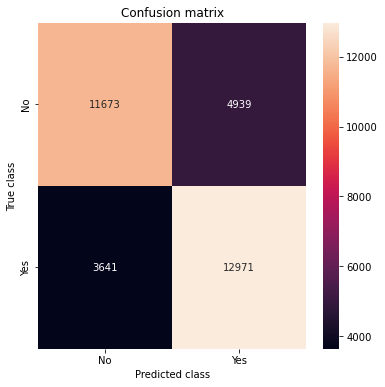

              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73     16612
         1.0       0.72      0.78      0.75     16612

    accuracy                           0.74     33224
   macro avg       0.74      0.74      0.74     33224
weighted avg       0.74      0.74      0.74     33224



In [72]:
pred_y_train_log = logit_reg.predict(X_resampled)
mostrar_resultados(y_resampled, pred_y_train_log)

In [93]:
# Calculating the metrics
accuracy = accuracy_score(y_resampled, pred_y_train_log)
precision = precision_score(y_resampled, pred_y_train_log)
sensitivity = recall_score(y_resampled, pred_y_train_log)  # Sensitivity is the same as recall

# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_resampled, pred_y_train_log).ravel()
specificity = tn / (tn+fp)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Accuracy: 0.74
Precision: 0.72
Sensitivity (Recall): 0.78
Specificity: 0.70


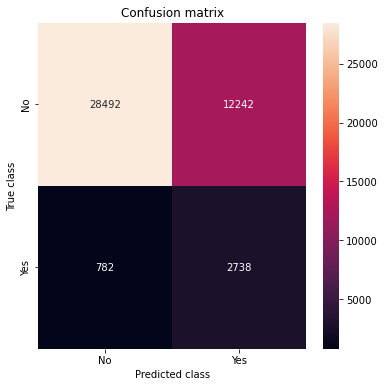

              precision    recall  f1-score   support

         0.0       0.97      0.70      0.81     40734
         1.0       0.18      0.78      0.30      3520

    accuracy                           0.71     44254
   macro avg       0.58      0.74      0.55     44254
weighted avg       0.91      0.71      0.77     44254



In [69]:
pred_y_test_log = logit_reg.predict(X_test)
mostrar_resultados(y_test, pred_y_test_log)

In [95]:
# Calculating the metrics
accuracy = accuracy_score(y_test, pred_y_test_log)
precision = precision_score(y_test, pred_y_test_log)
sensitivity = recall_score(y_test, pred_y_test_log)  # Sensitivity is the same as recall

# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_test, pred_y_test_log).ravel()
specificity = tn / (tn+fp)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Accuracy: 0.71
Precision: 0.18
Sensitivity (Recall): 0.78
Specificity: 0.70


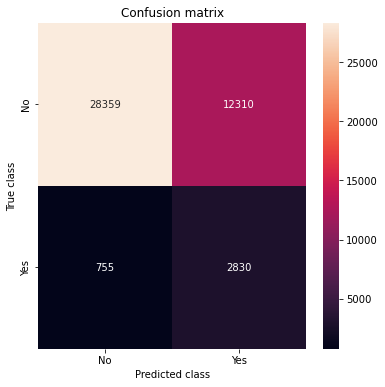

              precision    recall  f1-score   support

         0.0       0.97      0.70      0.81     40669
         1.0       0.19      0.79      0.30      3585

    accuracy                           0.70     44254
   macro avg       0.58      0.74      0.56     44254
weighted avg       0.91      0.70      0.77     44254



In [70]:
pred_y_val_log = logit_reg.predict(X_val)
mostrar_resultados(y_val, pred_y_val_log)

In [98]:
# Calculating the metrics
accuracy = accuracy_score(y_val, pred_y_val_log)
precision = precision_score(y_val, pred_y_val_log)
sensitivity = recall_score(y_val, pred_y_val_log)  # Sensitivity is the same as recall

# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_val, pred_y_val_log).ravel()
specificity = tn / (tn+fp)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Accuracy: 0.70
Precision: 0.19
Sensitivity (Recall): 0.79
Specificity: 0.70


In [98]:
# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: the actual classes (0,1) or (-1,1)
# y_score: probabilities to classify the observations
# returns false positive rate (fpr), true positive rate (tpr), and the threshold for those values
fpr, tpr, _ = roc_curve(y_true=logit_result.actual, y_score=logit_result['p(1)'])
# calculate the area under the curve
# send the coordinates in x and y
roc_auc = auc(x=fpr, y=tpr)
print(roc_auc)

0.486218420918724


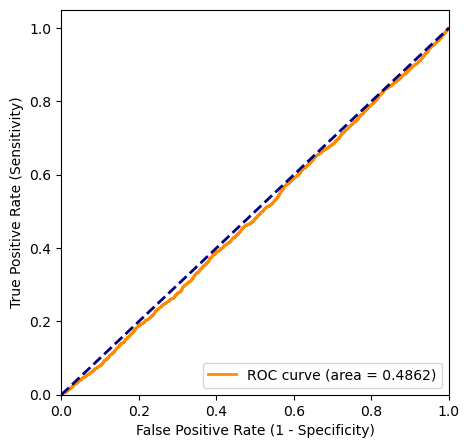

In [99]:
plt.figure(figsize=[5, 5])
#line width
lw = 2
#add ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
#add the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [139]:
# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: the actual classes (0,1) or (-1,1)
# y_score: probabilities to classify the observations
# returns false positive rate (fpr), true positive rate (tpr), and the threshold for those values
fpr, tpr, _ = roc_curve(y_true=logit_result_test.actual, y_score=logit_result_test['p(1)'])
# calculate the area under the curve
# send the coordinates in x and y
roc_auc = auc(x=fpr, y=tpr)
print(roc_auc)

0.8184072949974082


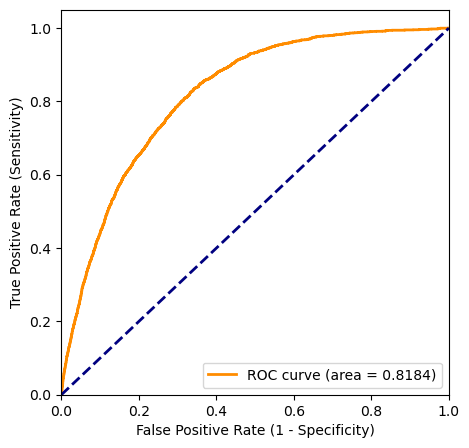

In [140]:
plt.figure(figsize=[5, 5])
#line width
lw = 2
#add ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
#add the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [141]:
# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: the actual classes (0,1) or (-1,1)
# y_score: probabilities to classify the observations
# returns false positive rate (fpr), true positive rate (tpr), and the threshold for those values
fpr, tpr, _ = roc_curve(y_true=logit_result_val.actual, y_score=logit_result_val['p(1)'])
# calculate the area under the curve
# send the coordinates in x and y
roc_auc = auc(x=fpr, y=tpr)
print(roc_auc)

0.8201231328141936


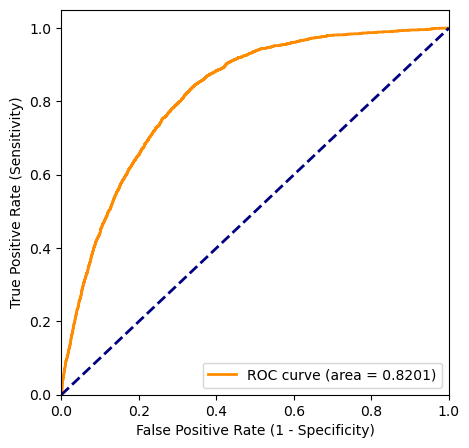

In [142]:
plt.figure(figsize=[5, 5])
#line width
lw = 2
#add ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
#add the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

##  2. KNN

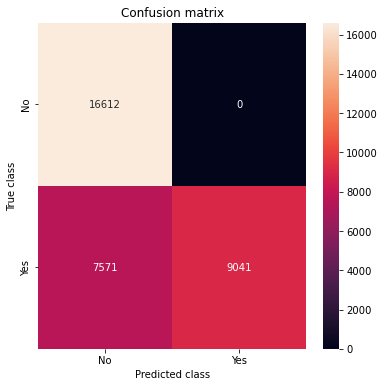

              precision    recall  f1-score   support

         0.0       0.69      1.00      0.81     16612
         1.0       1.00      0.54      0.70     16612

    accuracy                           0.77     33224
   macro avg       0.84      0.77      0.76     33224
weighted avg       0.84      0.77      0.76     33224



In [76]:
pred_y_train_knn = knn.predict(X_resampled)
mostrar_resultados(y_resampled, pred_y_train_knn)

In [100]:
# Calculating the metrics
accuracy = accuracy_score(y_resampled, pred_y_train_knn)
precision = precision_score(y_resampled, pred_y_train_knn)
sensitivity = recall_score(y_resampled, pred_y_train_knn)  # Sensitivity is the same as recall

# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_resampled, pred_y_train_knn).ravel()
specificity = tn / (tn+fp)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Accuracy: 0.77
Precision: 1.00
Sensitivity (Recall): 0.54
Specificity: 1.00


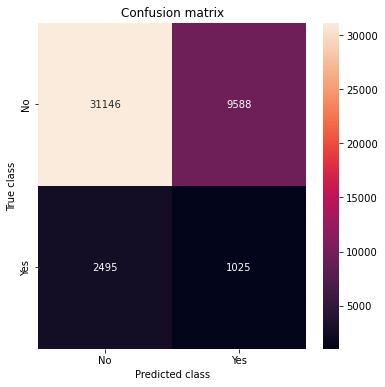

              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84     40734
         1.0       0.10      0.29      0.15      3520

    accuracy                           0.73     44254
   macro avg       0.51      0.53      0.49     44254
weighted avg       0.86      0.73      0.78     44254



In [77]:
pred_y_test_knn = knn.predict(X_test)
mostrar_resultados(y_test, pred_y_test_knn)


In [102]:
# Calculating the metrics
accuracy = accuracy_score(y_test, pred_y_test_knn)
precision = precision_score(y_test, pred_y_test_knn)
sensitivity = recall_score(y_test, pred_y_test_knn)  # Sensitivity is the same as recall

# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_test, pred_y_test_knn).ravel()
specificity = tn / (tn+fp)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Accuracy: 0.73
Precision: 0.10
Sensitivity (Recall): 0.29
Specificity: 0.76


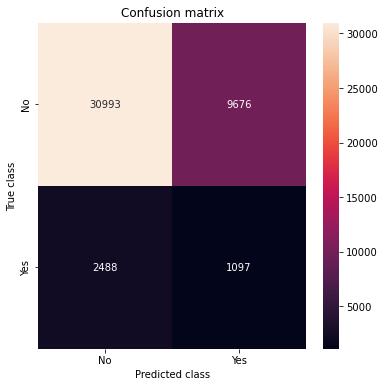

              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84     40669
         1.0       0.10      0.31      0.15      3585

    accuracy                           0.73     44254
   macro avg       0.51      0.53      0.49     44254
weighted avg       0.86      0.73      0.78     44254



In [78]:
pred_y_valid_knn = knn.predict(X_val)
mostrar_resultados(y_val, pred_y_valid_knn)


In [104]:
# Calculating the metrics
accuracy = accuracy_score(y_val, pred_y_valid_knn)
precision = precision_score(y_val, pred_y_valid_knn)
sensitivity = recall_score(y_val, pred_y_valid_knn)  # Sensitivity is the same as recall

# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_val, pred_y_valid_knn).ravel()
specificity = tn / (tn+fp)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Accuracy: 0.73
Precision: 0.10
Sensitivity (Recall): 0.31
Specificity: 0.76


In [115]:
# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: the actual classes (0,1) or (-1,1)
# y_score: probabilities to classify the observations
# returns false positive rate (fpr), true positive rate (tpr), and the threshold for those values
fpr, tpr, _ = roc_curve(y_true=knn_result.actual, y_score=knn_result['p(1)'])
# calculate the area under the curve
# send the coordinates in x and y
roc_auc = auc(x=fpr, y=tpr)
print(roc_auc)

0.8969275650197794


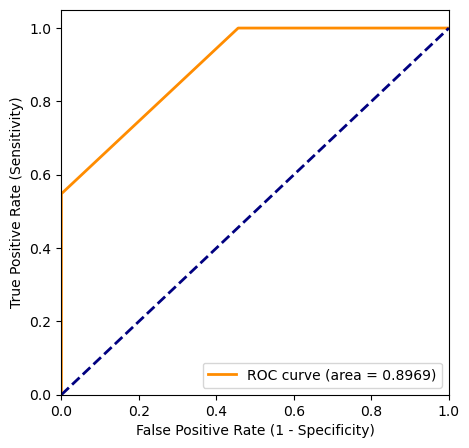

In [116]:
plt.figure(figsize=[5, 5])
#line width
lw = 2
#add ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
#add the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [145]:
# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: the actual classes (0,1) or (-1,1)
# y_score: probabilities to classify the observations
# returns false positive rate (fpr), true positive rate (tpr), and the threshold for those values
fpr, tpr, _ = roc_curve(y_true=knn_result_test.actual, y_score=knn_result_test['p(1)'])
# calculate the area under the curve
# send the coordinates in x and y
roc_auc = auc(x=fpr, y=tpr)
print(roc_auc)

0.5597047719619674


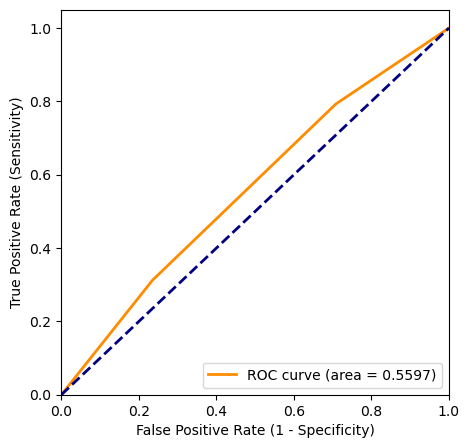

In [146]:
plt.figure(figsize=[5, 5])
#line width
lw = 2
#add ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
#add the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [147]:
# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: the actual classes (0,1) or (-1,1)
# y_score: probabilities to classify the observations
# returns false positive rate (fpr), true positive rate (tpr), and the threshold for those values
fpr, tpr, _ = roc_curve(y_true=knn_result_val.actual, y_score=knn_result_val['p(1)'])
# calculate the area under the curve
# send the coordinates in x and y
roc_auc = auc(x=fpr, y=tpr)
print(roc_auc)

0.5530219920953147


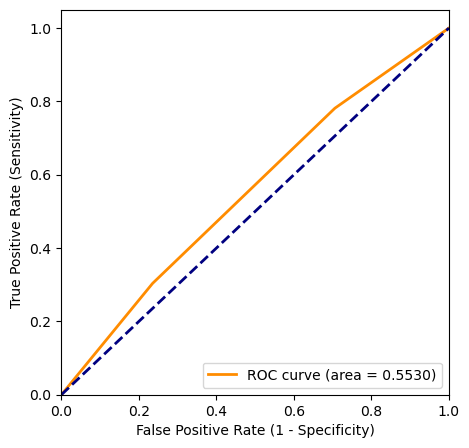

In [148]:
plt.figure(figsize=[5, 5])
#line width
lw = 2
#add ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
#add the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

## 3. Random Forest

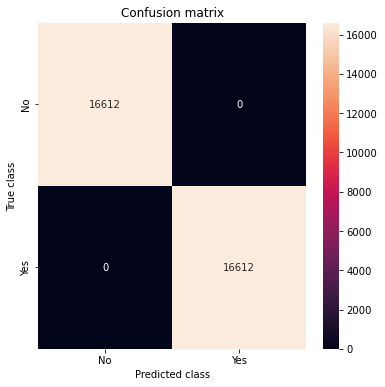

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16612
         1.0       1.00      1.00      1.00     16612

    accuracy                           1.00     33224
   macro avg       1.00      1.00      1.00     33224
weighted avg       1.00      1.00      1.00     33224



In [80]:
y_pred_train_rf=rf.predict(X_resampled)
mostrar_resultados(y_resampled,y_pred_train_rf)

In [106]:
# Calculating the metrics
accuracy = accuracy_score(y_resampled, y_pred_train_rf)
precision = precision_score(y_resampled, y_pred_train_rf)
sensitivity = recall_score(y_resampled, y_pred_train_rf)  # Sensitivity is the same as recall

# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_resampled, y_pred_train_rf).ravel()
specificity = tn / (tn+fp)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Accuracy: 1.00
Precision: 1.00
Sensitivity (Recall): 1.00
Specificity: 1.00


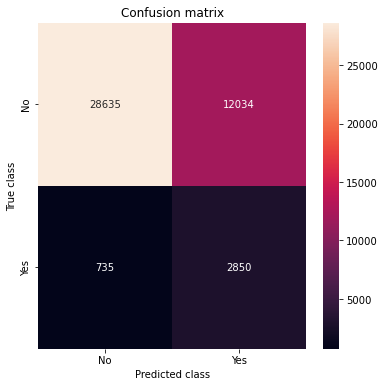

              precision    recall  f1-score   support

         0.0       0.97      0.70      0.82     40669
         1.0       0.19      0.79      0.31      3585

    accuracy                           0.71     44254
   macro avg       0.58      0.75      0.56     44254
weighted avg       0.91      0.71      0.78     44254



In [81]:
y_pred_val_rf=rf.predict(X_val)
mostrar_resultados(y_val,y_pred_val_rf)

In [108]:
# Calculating the metrics
accuracy = accuracy_score(y_val, y_pred_val_rf)
precision = precision_score(y_val, y_pred_val_rf)
sensitivity = recall_score(y_val, y_pred_val_rf)  # Sensitivity is the same as recall

# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_val, y_pred_val_rf).ravel()
specificity = tn / (tn+fp)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Accuracy: 0.71
Precision: 0.19
Sensitivity (Recall): 0.79
Specificity: 0.70


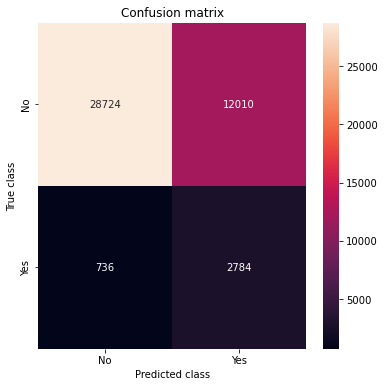

              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     40734
         1.0       0.19      0.79      0.30      3520

    accuracy                           0.71     44254
   macro avg       0.58      0.75      0.56     44254
weighted avg       0.91      0.71      0.78     44254



In [82]:
y_pred_test_rf=rf.predict(X_test)
mostrar_resultados(y_test,y_pred_test_rf)

In [110]:
# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_test_rf)
precision = precision_score(y_test, y_pred_test_rf)
sensitivity = recall_score(y_test, y_pred_test_rf)  # Sensitivity is the same as recall

# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test_rf).ravel()
specificity = tn / (tn+fp)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Accuracy: 0.71
Precision: 0.19
Sensitivity (Recall): 0.79
Specificity: 0.71


In [122]:
# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: the actual classes (0,1) or (-1,1)
# y_score: probabilities to classify the observations
# returns false positive rate (fpr), true positive rate (tpr), and the threshold for those values
fpr, tpr, _ = roc_curve(y_true=rf_result.actual, y_score=rf_result['p(1)'])
# calculate the area under the curve
# send the coordinates in x and y
roc_auc = auc(x=fpr, y=tpr)
print(roc_auc)

1.0


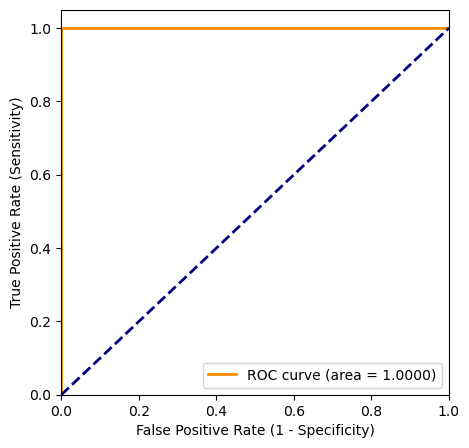

In [123]:
plt.figure(figsize=[5, 5])
#line width
lw = 2
#add ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
#add the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [200]:
# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: the actual classes (0,1) or (-1,1)
# y_score: probabilities to classify the observations
# returns false positive rate (fpr), true positive rate (tpr), and the threshold for those values
fpr, tpr, _ = roc_curve(y_true=rf_result_test.actual, y_score=rf_result_test['p(1)'])
# calculate the area under the curve
# send the coordinates in x and y
roc_auc = auc(x=fpr, y=tpr)
print(roc_auc)

0.8237293827127982


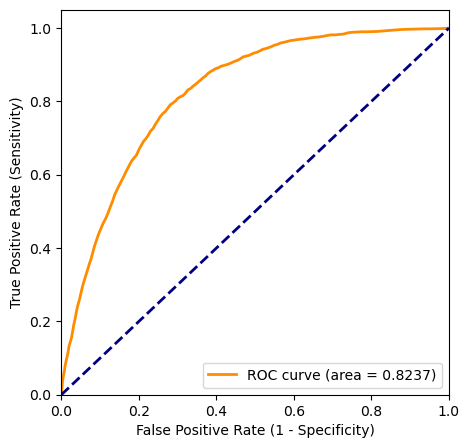

In [201]:
plt.figure(figsize=[5, 5])
#line width
lw = 2
#add ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
#add the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [202]:
# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: the actual classes (0,1) or (-1,1)
# y_score: probabilities to classify the observations
# returns false positive rate (fpr), true positive rate (tpr), and the threshold for those values
fpr, tpr, _ = roc_curve(y_true=rf_result_val.actual, y_score=rf_result_val['p(1)'])
# calculate the area under the curve
# send the coordinates in x and y
roc_auc = auc(x=fpr, y=tpr)
print(roc_auc)

0.82494045829729


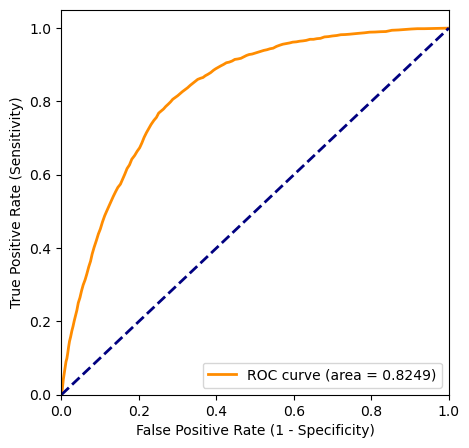

In [203]:
plt.figure(figsize=[5, 5])
#line width
lw = 2
#add ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
#add the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

## 4. SVC

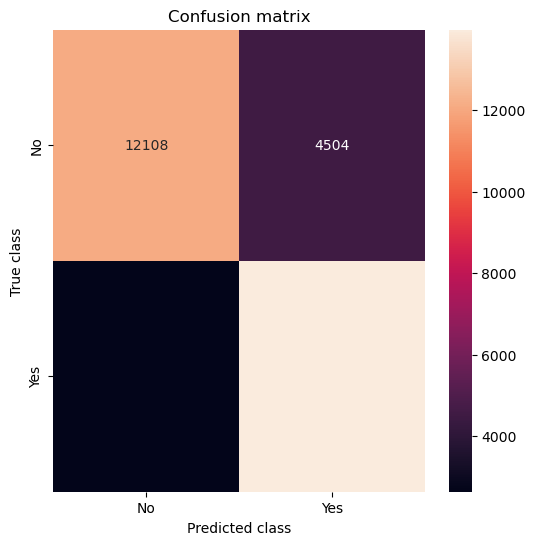

              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77     16612
         1.0       0.76      0.84      0.80     16612

    accuracy                           0.79     33224
   macro avg       0.79      0.79      0.78     33224
weighted avg       0.79      0.79      0.78     33224



In [127]:
y_pred_train_SVC=svc.predict(X_resampled)
mostrar_resultados(y_resampled, y_pred_train_SVC)

In [130]:
# Calculating the metrics
accuracy = accuracy_score(y_resampled, y_pred_train_SVC)
precision = precision_score(y_resampled, y_pred_train_SVC)
sensitivity = recall_score(y_resampled, y_pred_train_SVC)  # Sensitivity is the same as recall

# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_resampled, y_pred_train_SVC).ravel()
specificity = tn / (tn+fp)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Accuracy: 0.79
Precision: 0.76
Sensitivity (Recall): 0.84
Specificity: 0.73


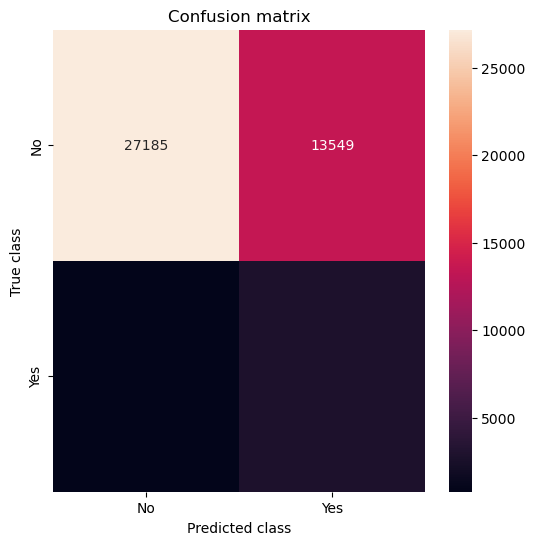

              precision    recall  f1-score   support

         0.0       0.97      0.67      0.79     40734
         1.0       0.17      0.78      0.28      3520

    accuracy                           0.68     44254
   macro avg       0.57      0.73      0.53     44254
weighted avg       0.91      0.68      0.75     44254



In [128]:
y_pred_test_SVC=svc.predict(X_test)
mostrar_resultados(y_test, y_pred_test_SVC)

In [131]:
# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_test_SVC)
precision = precision_score(y_test, y_pred_test_SVC)
sensitivity = recall_score(y_test, y_pred_test_SVC)  # Sensitivity is the same as recall

# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test_SVC).ravel()
specificity = tn / (tn+fp)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Accuracy: 0.68
Precision: 0.17
Sensitivity (Recall): 0.78
Specificity: 0.67


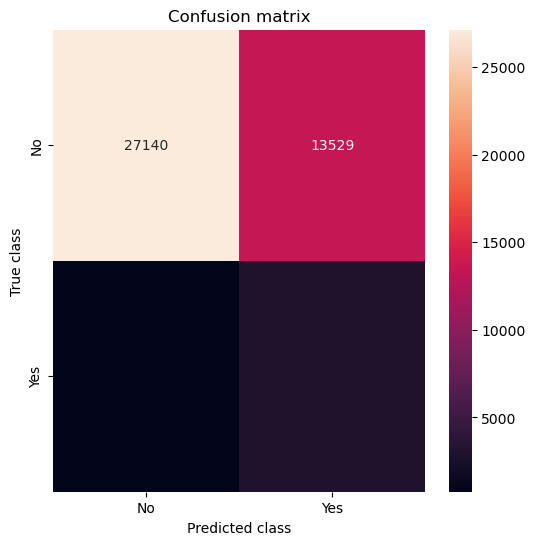

              precision    recall  f1-score   support

         0.0       0.97      0.67      0.79     40669
         1.0       0.17      0.79      0.28      3585

    accuracy                           0.68     44254
   macro avg       0.57      0.73      0.54     44254
weighted avg       0.91      0.68      0.75     44254



In [129]:
y_pred_val_SVC=svc.predict(X_val)
mostrar_resultados(y_val, y_pred_val_SVC)

In [132]:
# Calculating the metrics
accuracy = accuracy_score(y_val, y_pred_val_SVC)
precision = precision_score(y_val, y_pred_val_SVC)
sensitivity = recall_score(y_val, y_pred_val_SVC)  # Sensitivity is the same as recall

# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_val, y_pred_val_SVC).ravel()
specificity = tn / (tn+fp)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Accuracy: 0.68
Precision: 0.17
Sensitivity (Recall): 0.79
Specificity: 0.67


In [135]:
# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: the actual classes (0,1) or (-1,1)
# y_score: probabilities to classify the observations
# returns false positive rate (fpr), true positive rate (tpr), and the threshold for those values
fpr, tpr, _ = roc_curve(y_true=svc_result.actual, y_score=svc_result['p(1)'])
# calculate the area under the curve
# send the coordinates in x and y
roc_auc = auc(x=fpr, y=tpr)
print(roc_auc)

0.8146208399966333


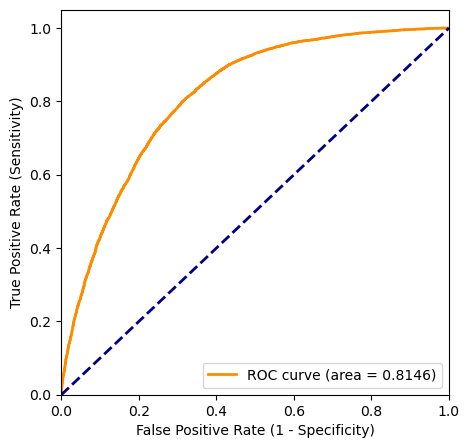

In [136]:
plt.figure(figsize=[5, 5])
#line width
lw = 2
#add ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
#add the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [154]:
# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: the actual classes (0,1) or (-1,1)
# y_score: probabilities to classify the observations
# returns false positive rate (fpr), true positive rate (tpr), and the threshold for those values
fpr, tpr, _ = roc_curve(y_true=svc_result_test.actual, y_score=svc_result_test['p(1)'])
# calculate the area under the curve
# send the coordinates in x and y
roc_auc = auc(x=fpr, y=tpr)
print(roc_auc)

0.8155735978605506


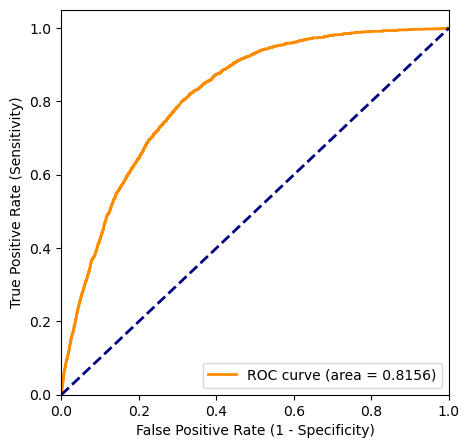

In [155]:
plt.figure(figsize=[5, 5])
#line width
lw = 2
#add ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
#add the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [156]:
# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: the actual classes (0,1) or (-1,1)
# y_score: probabilities to classify the observations
# returns false positive rate (fpr), true positive rate (tpr), and the threshold for those values
fpr, tpr, _ = roc_curve(y_true=svc_result_val.actual, y_score=svc_result_val['p(1)'])
# calculate the area under the curve
# send the coordinates in x and y
roc_auc = auc(x=fpr, y=tpr)
print(roc_auc)

0.4844313616660816


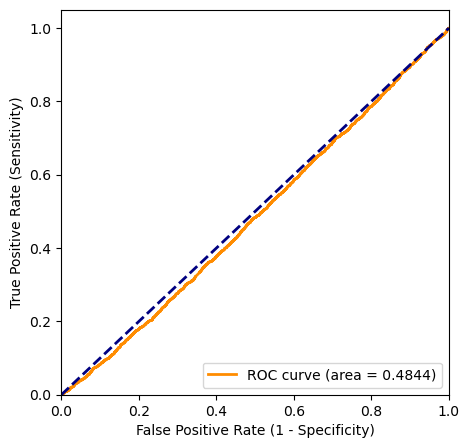

In [157]:
plt.figure(figsize=[5, 5])
#line width
lw = 2
#add ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
#add the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

## Random forest method for feature selection

In [87]:
# Get feature importances from the trained Random Forest model.
importances=rf.feature_importances_

In [88]:
importances

array([0.07889926, 0.02694031, 0.07396432, 0.0928237 , 0.10382027,
       0.05460649, 0.06939875, 0.07201288, 0.06761018, 0.01769792,
       0.00539991, 0.04472593, 0.00097223, 0.01376613, 0.01482166,
       0.01553948, 0.04785503, 0.02300469, 0.00013585, 0.02772078,
       0.00660565, 0.00830348, 0.0094572 , 0.00947901, 0.00695088,
       0.00749502, 0.00871517, 0.01117027, 0.01350285, 0.01677651,
       0.01903537, 0.03079281])

In [89]:
feature_importances = pd.DataFrame({'feature': ['General_Health', 'Checkup', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
                          'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
                         'Exercise_Yes', 'Diabetes_No, pre-diabetes or borderline diabetes',
                          'Diabetes_Yes', 'Diabetes_Yes, but female told only during pregnancy', 'Skin_Cancer_Yes',
                          'Other_Cancer_Yes', 'Depression_Yes', 'Arthritis_Yes', 'Sex_Male', 'Sex_Non-Binary',
                          'Smoking_History_Yes', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39',
                          'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_50-54', 'Age_Category_55-59',
                          'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79',
                          'Age_Category_80+'], 'importance': importances})
print(feature_importances.sort_values(by='importance', ascending=False))

                                              feature  importance
4                                                 BMI    0.103820
3                                         Weight_(kg)    0.092824
0                                      General_Health    0.078899
2                                         Height_(cm)    0.073964
7                        Green_Vegetables_Consumption    0.072013
6                                   Fruit_Consumption    0.069399
8                             FriedPotato_Consumption    0.067610
5                                 Alcohol_Consumption    0.054606
16                                      Arthritis_Yes    0.047855
11                                       Diabetes_Yes    0.044726
31                                   Age_Category_80+    0.030793
19                                Smoking_History_Yes    0.027721
1                                             Checkup    0.026940
17                                           Sex_Male    0.023005
30        

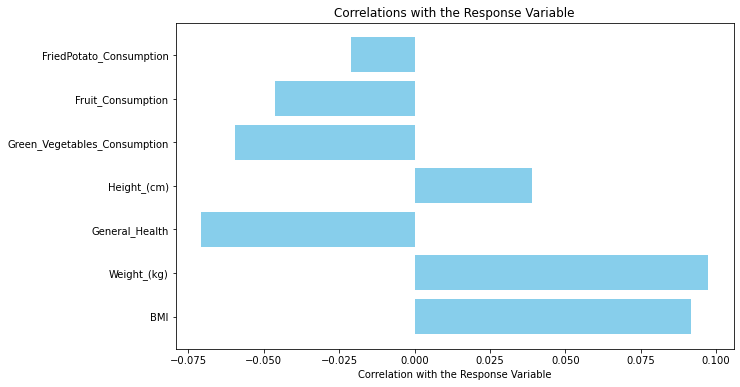

In [79]:
# Select relevant columns of random forest
selected_columns = ["BMI", "Weight_(kg)", "General_Health", "Height_(cm)",
                     "Green_Vegetables_Consumption", "Fruit_Consumption",
                     "FriedPotato_Consumption"]

X_resampled_selected = X_resampled[selected_columns]

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(X_resampled_selected, y_resampled, rowvar=False)

# Extract correlations with the response variable
correlations_with_response = correlation_matrix[-1, :-1]

# Variable names
variable_names = selected_columns

# Plot correlations in a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(variable_names, correlations_with_response, color='skyblue')
plt.xlabel('Correlation with the Response Variable')
plt.title('Correlations with the Response Variable')
plt.show()

# References:
- Cómo Crear un Mapa de Calor de Correlaciones en Python. (s/f). CodeToDevs | Python, Django, CSS, JavaScript. Recuperado el 20 de noviembre de 2023, de https://www.codetodevs.com/como-crear-mapa-calor-correlaciones-python-corrcoef-heatmap/
- Correlation and Scatterplots — Basic Analytics in Python. (s/f). Sfu.ca. Recuperado el 20 de noviembre de 2023, de https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html
- Cristianini, N., & Shawe-Taylor, J. (2000). Support Vector Machines. Cambridge University Press. https://doi.org/10.1017/CBO9780511801389
- Follow, I. I. (2021, noviembre 25). How to split a Dataset into Train and Test Sets using Python. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-split-a-dataset-into-train-and-test-sets-using-python/
- Hernandez, R. D. (2022, enero 26). Bucle for en Python: Ejemplo de for i en rango. freecodecamp.org. https://www.freecodecamp.org/espanol/news/bucle-for-en-python-ejemplo-de-for-i-en-range/
- Oshiro, C., de Paula, R., & Veloso, P. A. S. (2017). To Tune or Not to Tune the Number of Trees in Random Forest. Journal of Machine Learning Research, 18(1), 1-40. https://www.jmlr.org/papers/volume18/17-269/17-269.pdf
- Over-sampling — version 0.11.0. (s/f). Imbalanced-learn.org. Recuperado el 20 de noviembre de 2023, de https://imbalanced-learn.org/stable/over_sampling.html
- Panda, D. K., y P. K. Dash. "Outlier detection for data cleaning: A survey." Computers and Informatics 42, no. 1 (2015): 1-33. https://www.sciencedirect.com/science/article/pii/S0957417414002000
- Pandas: Get dummies. (s/f). Stack Overflow. Recuperado el 20 de noviembre de 2023, de https://stackoverflow.com/questions/36285155/pandas-get-dummies
- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., & Vanderplas, J. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.
- Rivest, R.A. (2000). The optimal value of k for k-nearest neighbors. Machine Learning, 39(1), 5-22.
- Termehch, A., Doskenov, B., Young Lee, G., & Alzamil, L. (2021). Data cleaning for machine learning: A survey. arXiv preprint arXiv:2109.07127.  https://arxiv.org/abs/2109.07127   
- Tibshirani, R., Hastie, T., & Friedman, J. (2001). Regularization and variable selection via the elastic net. Journal of the Royal Statistical Society: Series B (Statistical Methodology), 63(2), 227-242.
- Undersampling and oversampling imbalanced data. (2018, abril 9). Kaggle.com; Kaggle. https://www.kaggle.com/code/residentmario/undersampling-and-oversampling-imbalanced-data


